# Dependence analysis between fighting frequency and result/outcome of fights, using descriptive statistics.

## Segment 1: *Introduction*

Analysis main objective is to establish, if there is any significant reliance between length of time interval among fights in MMA and outcome/result of these bouts, using descriptive statistics. **Result in the analysis is defined as** percentage ratio between amount of wins and total amount of wins and losses, for certain fighter (as an analysis assumption, **fights that have ended with draw, or no-contest, will not be taken into account**).

Level of statistical significance in the analysis is defined as **10 percentage points**. That being said, analysis will not pass over dependencies under that level, if there is enough of collected data to state a rational hypothesis.

Subject of analysis will cover all **professional** fights recorded via www.sherdog.com.

In order to investigate potential reliances, which are distinctive for certain groups, analysis will consider following categories:

* current UFC roster
* current UFC roster, having regard to bouts that took place exclusively inside UFC
* current UFC roster, having regard to bouts that took place exclusively inside UFC (gender distinction)
* current UFC roster, having regard to bouts that took place exclusively inside UFC (weight class distinction)
* all fights recorded in Sherdog's database, having regard to fighters, that had lost their previous fight via KO/TKO
* current UFC roster, having regard to fighters, that had lost their previous fight via KO/TKO
* all fights recorded in Sherdog's database, having regard to fighters, that have had 5 rounds bout previously
* current UFC roster, having regard to fighters, that have had 5 rounds bout previously

Additionally, analysis will introduce some interesting facts regarding data set:

* picture interval with highest number of observations, for each weight class inside UFC
* picture reliance between result of all fights recorded in Sherdog's database and UFC roster
* picture percentage of fighters from current UFC roster, that had won their MMA debut
* show which fighter in MMA have had the largest length of a discontinuity between fights and how many days it have taken

***please note, that all data used in analysis was collected on 10th of November 2019.***


## Segment 2: *Loading, cleaning and analyzing Sherdog's database*

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import os
from datetime import datetime
from dateutil.parser import parse
from datetime import timedelta
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [3]:
# Loading Sherdog's database.
sherdog_data = pd.read_csv('sherdog_final.csv', header=0, sep=";", engine='python')
sherdog_data[0:10]

,Fighter,Opponent,Result,Event,Event_date,Method,Referee,Round,Time;
0,Tony Galindo,Tony Lopez,loss,KOTC 49 Soboba,Mar / 20 / 2005,KO (Punches),NaN,1,3:24;
1,Tony Galindo,Joey Villasenor,loss,KOTC 21 Invasion,Feb / 21 / 2003,TKO (Corner Stoppage),Larry Landless,1,5:00;
2,Tony Galindo,Brian Sleeman,loss,GC 6 Caged Beasts,Sep / 09 / 2001,TKO (Corner Stoppage),Larry Landless,2,3:10;
3,Tony Galindo,Reggie Cardiel,win,KOTC 9 Showtime,Jun / 23 / 2001,Decision,NaN,2,5:00;
4,Tony Galindo,Reggie Cardiel,draw,KOTC 7 Wet and Wild,Feb / 24 / 2001,Draw,NaN,2,5:00;
5,Tony Galindo,Brian Hawkins,win,KOTC 6 Road Warriors,Nov / 29 / 2000,TKO (Punches),NaN,1,1:30;
6,Tony Galindo,Kurt Rojo,win,KOTC 4 Gladiators,Jun / 24 / 2000,KO (Punch),NaN,1,0:07;
7,Kurt Rojo,Phillip Miller,loss,GC 1 Gladiator Challenge 1,Dec / 09 / 2000,Decision,NaN,3,5:00;
8,Kurt Rojo,Tony Galindo,loss,KOTC 4 Gladiators,Jun / 24 / 2000,KO (Punch),NaN,1,0:07;
9,Brian Hawkins,James Lee,loss,KOTC Drop Zone,Mar / 18 / 2006,Submission (Heel Hook),NaN,1,0:24;


In [4]:
# Creating data frame copy reduced to essential columns.
sherdog_selected_data = sherdog_data[['Fighter', 'Result', 'Event_date']].copy()

In [5]:
sherdog_selected_data[0:10]

,Fighter,Result,Event_date
0,Tony Galindo,loss,Mar / 20 / 2005
1,Tony Galindo,loss,Feb / 21 / 2003
2,Tony Galindo,loss,Sep / 09 / 2001
3,Tony Galindo,win,Jun / 23 / 2001
4,Tony Galindo,draw,Feb / 24 / 2001
5,Tony Galindo,win,Nov / 29 / 2000
6,Tony Galindo,win,Jun / 24 / 2000
7,Kurt Rojo,loss,Dec / 09 / 2000
8,Kurt Rojo,loss,Jun / 24 / 2000
9,Brian Hawkins,loss,Mar / 18 / 2006


In [6]:
# Checking if there are any missing values in 'Event_date' column.
sherdog_selected_data[sherdog_selected_data['Event_date'].isna()]

,Fighter,Result,Event_date


In [7]:
# Converting data in 'Event_date' column from string to date.
converted_dates = []
for i in range(len(sherdog_selected_data['Event_date'])):
    converted_dates.append(parse(sherdog_selected_data['Event_date'][i]))

In [8]:
# Assigning converted data to 'Event_date' column.
sherdog_selected_data['Event_date'] = converted_dates

In [9]:
sherdog_selected_data[0:10]

,Fighter,Result,Event_date
0,Tony Galindo,loss,2005-03-20
1,Tony Galindo,loss,2003-02-21
2,Tony Galindo,loss,2001-09-09
3,Tony Galindo,win,2001-06-23
4,Tony Galindo,draw,2001-02-24
5,Tony Galindo,win,2000-11-29
6,Tony Galindo,win,2000-06-24
7,Kurt Rojo,loss,2000-12-09
8,Kurt Rojo,loss,2000-06-24
9,Brian Hawkins,loss,2006-03-18


In [10]:
# Creating time intervals between fights for each fighter.
intervals = []
for i in range(len(sherdog_selected_data['Fighter']) - 1):
    if sherdog_selected_data['Fighter'][i] == sherdog_selected_data['Fighter'][i + 1]:
        intervals.append(sherdog_selected_data['Event_date'][i] - sherdog_selected_data['Event_date'][i + 1])
        intervals[i] = intervals[i].days
    else:
        intervals.append(0)
intervals.append(0)   # adding last time interval (0) for the last fighter in database.

In [11]:
# Creating new column in data frame and assigning time intervals to it.
sherdog_selected_data['Time_interval'] = intervals

In [12]:
# Data validation - all time intervals should be greater or equal to 0.
'''One record is corrupted due to the missing debut date in Sherdog's database. 
The record will be omitted in subsequent analysis.'''
sherdog_selected_data[sherdog_selected_data['Time_interval'] < 0]

,Fighter,Result,Event_date,Time_interval
25590,Paulo de Jesus,loss,1995-07-05,-2340


In [13]:
# Removing mentioned record from database.
sherdog_selected_data = sherdog_selected_data.drop(sherdog_selected_data.index[25590])

In [14]:
# Taking a closer look at distribution.
sherdog_selected_data.describe()

,Time_interval
count,504347.000000
mean,162.577224
std,293.667982
min,0.000000
25%,0.000000
50%,77.000000
75%,189.000000
max,8730.000000


In [15]:
# Assigning mean, median and mode to variables.
sher_mean = sherdog_selected_data['Time_interval'].mean()
sher_med = sherdog_selected_data['Time_interval'].median()
# Slightly moving mode for the sake of visualization.
sher_mode = sherdog_selected_data['Time_interval'].mode().get_values() + 5                           

In [16]:
# Counting number of values in 'Time_interval' column.
len(sherdog_selected_data['Time_interval'].value_counts())

2947

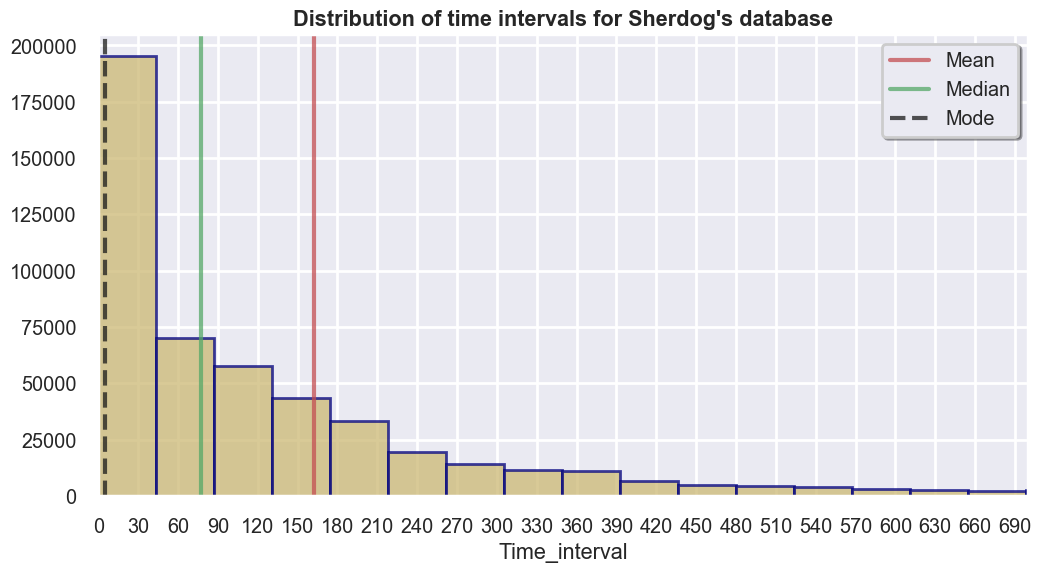

In [17]:
# Visualization of data distribution.
plt.rcdefaults()
    
plt.figure(figsize=(12,6), dpi= 100)
sns.set(style='darkgrid')
sns.set_context('poster', font_scale = 0.65)
ax = sns.distplot(sherdog_selected_data['Time_interval'], kde=False, color='y', bins=200,
                  hist_kws=dict(edgecolor='navy', alpha=0.75))
ax.set_xlim(0, 700)
ax.xaxis.set_major_locator(plt.MaxNLocator(25))

ax.axvline(sher_mean, color='r', linestyle='solid', alpha=0.75)
ax.axvline(sher_med, color='g', linestyle='solid', alpha=0.75)
ax.axvline(sher_mode, color='k', linestyle='dashed', alpha=0.75)
plt.title("Distribution of time intervals for Sherdog's database", fontweight='bold')
plt.legend({'Mean':sher_mean, 'Median':sher_med, 'Mode':sher_mode}, frameon=True, shadow=True)
plt.show()

In [18]:
# Showing 15 most frequent time intervals in database.
sherdog_selected_data['Time_interval'].value_counts().nlargest(15)

0      138034
63       6804
56       6385
91       6185
70       6066
28       6003
35       5913
84       5789
49       5756
77       5713
42       5529
98       5367
105      5138
119      5025
21       4858
Name: Time_interval, dtype: int64

In [19]:
sherdog_selected_data[0:10]

,Fighter,Result,Event_date,Time_interval
0,Tony Galindo,loss,2005-03-20,758
1,Tony Galindo,loss,2003-02-21,530
2,Tony Galindo,loss,2001-09-09,78
3,Tony Galindo,win,2001-06-23,119
4,Tony Galindo,draw,2001-02-24,87
5,Tony Galindo,win,2000-11-29,158
6,Tony Galindo,win,2000-06-24,0
7,Kurt Rojo,loss,2000-12-09,168
8,Kurt Rojo,loss,2000-06-24,0
9,Brian Hawkins,loss,2006-03-18,1121


We can see that distribution is positively skewed. We are dealing with ***2947 different time intervals***. Given distribution skewness, amount of different time intervals, fact that we are working with whole population and practical necessity to categorize data in readable and clear manner, i have decided to create brackets (categories), which can be used in further analysis to describe data:

* Bracket No. 1 - Debut/on the same day *(0 days)*
* Bracket No. 2 - Very often *(1-90 days)*
* Bracket No. 3 - Often *(91-120 days)*
* Bracket No. 4 - Moderately often *(121-182 days)*
* Bracket No. 5 - Infrequently *(183-365 days)*
* Bracket No. 6 - Very rarely *(366-728 days)*
* Bracket No. 7 - Returning after very long layoff *(above 729 days)*

**Bracket No. 1** contains debuts and bouts that took place on the same day (in most cases as a part of one-night tournaments).

**Bracket No. 2** represents frequency comparable to four bouts per year (relatively rare thing, even if in respect to amount of events that UFC is producing).

**Bracket No. 3** represents frequency comparable to three bouts per year (a bit more likely to happen in UFC, than four bouts per year, although still quite rare).

**Bracket No. 4** represents frequency comparable to two bouts per year, which usually is minimal amount of bouts per year from fighter's perspective. It also happens to meet UFC demand, given that in 2019 UFC have scheduled 43 events. Each event usually contains 11-12 bouts, which gives us approximately demand for 1032 fighters in range of calendar year. UFC roster counts 698 athletes (*based on data from www.ufc.com on November 12, 2019*), so there is a good reason to consider this frequency as "golden standard".

**Bracket No. 5** represents frequency comparable to one bout per year. Based on evoked data, we can consider that this frequency is also quite common inside UFC, although it might not be the case for fighters outside UFC, especially in early stages of career development.

**Bracket No. 6** represents frequency which is lower than one bout per year, but higher than one bout per two years.

**Bracket No. 7** represents cases where fighter was coming back to MMA after layoff that took over two years.

In [20]:
# Preparing brackets and labels for each category and assigning them to cats variable.
bins = [0, 1, 91, 121, 183, 366, 729, 10000]
group_names = ['Debut/on the same day', 
               'Very often (~4 bouts per year)', 
               'Often (~3 bouts per year)', 
               'Moderately often (~2 bouts per year)', 
               'Infrequently (~1 bout per year)', 
               'Very rarely (less often than once per year)',
               'Returning after very long layoff (2 years or more)']
cats = pd.cut(sherdog_selected_data['Time_interval'], bins, labels=group_names, right=False)

In [21]:
# Creating and assigning new column with interval categories, to data frame.
sherdog_selected_data['Descriptive_interval'] = cats

In [22]:
sherdog_selected_data[0:20]

,Fighter,Result,Event_date,Time_interval,Descriptive_interval
0,Tony Galindo,loss,2005-03-20,758,Returning after very long layoff (2 years or m...
1,Tony Galindo,loss,2003-02-21,530,Very rarely (less often than once per year)
2,Tony Galindo,loss,2001-09-09,78,Very often (~4 bouts per year)
3,Tony Galindo,win,2001-06-23,119,Often (~3 bouts per year)
4,Tony Galindo,draw,2001-02-24,87,Very often (~4 bouts per year)
5,Tony Galindo,win,2000-11-29,158,Moderately often (~2 bouts per year)
6,Tony Galindo,win,2000-06-24,0,Debut/on the same day
7,Kurt Rojo,loss,2000-12-09,168,Moderately often (~2 bouts per year)
8,Kurt Rojo,loss,2000-06-24,0,Debut/on the same day
9,Brian Hawkins,loss,2006-03-18,1121,Returning after very long layoff (2 years or m...


In [23]:
# Assigning 'Descriptive_interval' column to variable.
sherdog_brackets = sherdog_selected_data['Descriptive_interval']

In [24]:
# Creating variables where interval data is assigned based on type of fight outcome.
all_fights_count = sherdog_brackets.value_counts()
win_fights_count = sherdog_brackets[sherdog_selected_data['Result'] == 'win'].value_counts()
loss_fights_count = sherdog_brackets[sherdog_selected_data['Result'] == 'loss'].value_counts()
draw_fights_count = sherdog_brackets[sherdog_selected_data['Result'] == 'draw'].value_counts()
nc_fights_count = sherdog_brackets[sherdog_selected_data['Result'] == 'NC'].value_counts()

In [25]:
# Sum of all fights stored in database.
all_fights_count.sum()

504347

In [26]:
# Sum of all fights ended with victory and stored in database.
win_fights_count.sum()

246434

In [27]:
# Sum of all fights ended with loss and stored in database.
loss_fights_count.sum()

246343

In [28]:
# Sum of all fights ended with draw and stored in database.
draw_fights_count.sum()

8702

In [29]:
# Sum of all fights ended with no-contest and stored in database.
nc_fights_count.sum()

2868

In [30]:
# Data validation - checking if there is any record that was not qualified as either win, loss, draw or no-contest.
sum_of_brackets = win_fights_count.sum() + loss_fights_count.sum() + draw_fights_count.sum() + nc_fights_count.sum()
if all_fights_count.sum() == sum_of_brackets:
    print('Verification successful!')

Verification successful!


In [31]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
sherdog_pct = win_fights_count/(win_fights_count + loss_fights_count)

In [32]:
# Sorting results in ascending order.
sherdog_pct_sorted = sherdog_pct.sort_values(ascending=False)

In [33]:
# Converting fractions to percentages.
sherdog_true_pct = sherdog_pct * 100

In [34]:
sherdog_pct_sorted

Often (~3 bouts per year)                             0.553287
Moderately often (~2 bouts per year)                  0.542192
Very often (~4 bouts per year)                        0.539734
Infrequently (~1 bout per year)                       0.521535
Very rarely (less often than once per year)           0.490557
Returning after very long layoff (2 years or more)    0.454122
Debut/on the same day                                 0.424212
Name: Descriptive_interval, dtype: float64

Time interval labeled as 'Often' scored the highest percentage rate, as it comes to result **~ 55%**, nonetheless it is worth noticing, that there is not much difference between top four categories, that are representing range from 1 to 4 bouts per year (gap is not exceeding 2 percentage points).

More drastic decline in result percentage rate is observed with category, that fought less often than once per year - this is first time we are being introduced to negative result rate (*below 50%*). Even more drastic decline happens between mentioned group and one, which is returning after very long layoff (*almost 4 percentage points*). 

Debutants and fighters that had bout on the same day scored the lowest result. We can observe significant difference between this category and top categories (*over 13 percentage points*). It is worth considering, that a lot of debutants were fighting against athletes, that already have had some experience in MMA, which can possibly lead to reducing their result percentage rate to some degree.
 
**Conclusions:**

* there is no statistically significant difference between groups, that are ranging from 1 to 4 fights per year
* there is noticeable difference (6 percentage points) between category, that represents 3 bouts per year and one, that was fighting less often than once per year
* there is statistically significant difference between group, that was labeled as 'Often' and one, that was returning after very long layoff (2 years or more)

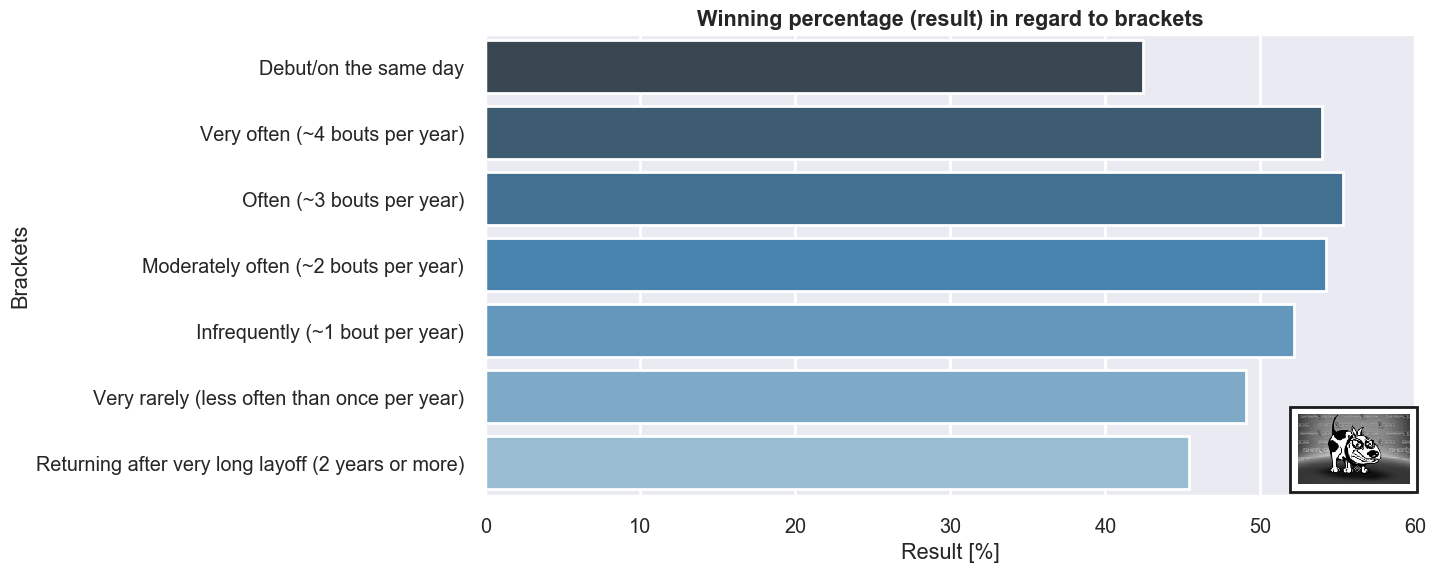

In [35]:
# Chart representing result depicted as percentages in regard to brackets, for all fights recorded in Sherdog's database.
plt.figure(figsize=(12,6), dpi= 100)
sns.set(style='darkgrid')
sns.set_context('poster', font_scale = 0.65)
ax = sns.barplot(sherdog_true_pct.values, sherdog_true_pct.index, palette="Blues_d")
ax.set_xlim(0, 60)
ax.set(xlabel='Result [%]', ylabel='Brackets')

sher_logo = mpimg.imread('sherdog.jpg')
imagebox = OffsetImage(sher_logo, zoom=0.4)
ab = AnnotationBbox(imagebox, (56, 5.8))
ax.add_artist(ab)

plt.title('Winning percentage (result) in regard to brackets', fontweight='bold')
plt.show()

In [36]:
# Changing dynamics for each category in regard to result.
sherdog_pct_sorted.pct_change()

Often (~3 bouts per year)                                  NaN
Moderately often (~2 bouts per year)                 -0.020054
Very often (~4 bouts per year)                       -0.004533
Infrequently (~1 bout per year)                      -0.033720
Very rarely (less often than once per year)          -0.059397
Returning after very long layoff (2 years or more)   -0.074272
Debut/on the same day                                -0.065864
Name: Descriptive_interval, dtype: float64

In [37]:
# Total amount of observations for each bracket.
all_fights_count

Debut/on the same day                                 138034
Very often (~4 bouts per year)                        130115
Infrequently (~1 bout per year)                        74233
Moderately often (~2 bouts per year)                   61891
Often (~3 bouts per year)                              45663
Very rarely (less often than once per year)            35188
Returning after very long layoff (2 years or more)     19223
Name: Descriptive_interval, dtype: int64

The highest amount of observations was registered for debut/on the same day category and for intervals labeled as 'Very Often'. It should not be much of a surprise, that the lowest amount of observations landed in low frequency intervals. Fighters are benefiting from fighting more often in many ways - the most obvious is of course financial reason. Suffice to say, that taking fights less often, than once per year is rather a consequence of exceptional circumstances, than conscious strategy.

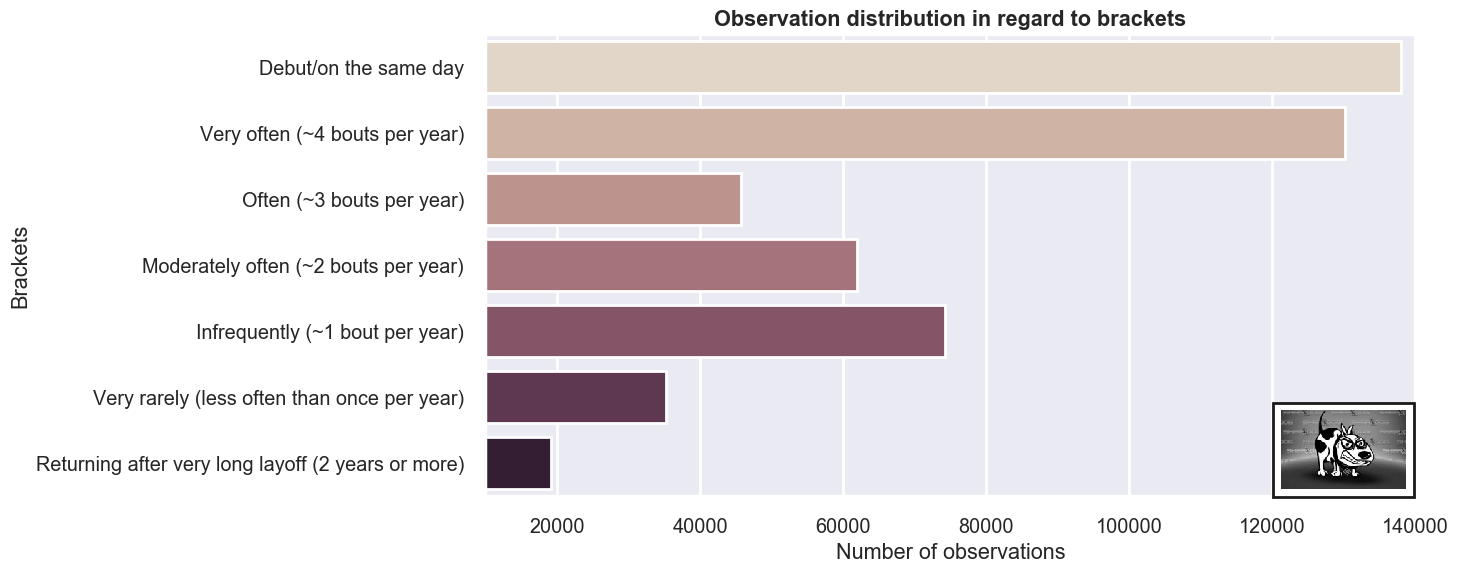

In [38]:
# Chart representing number of observations in regard to brackets, for all fights recorded in Sherdog's database.
plt.figure(figsize=(12,6), dpi= 100)
sns.set(style='darkgrid')
sns.set_context('poster', font_scale = 0.65)
ax = sns.barplot(all_fights_count.values, all_fights_count.index, palette="ch:.25")
ax.set_xlim(10000, 140000)
ax.set(xlabel='Number of observations', ylabel='Brackets')

sher_logo = mpimg.imread('sherdog.jpg')
imagebox = OffsetImage(sher_logo, zoom=0.45)
ab = AnnotationBbox(imagebox, (130000, 5.8))
ax.add_artist(ab)

plt.title('Observation distribution in regard to brackets', fontweight='bold')
plt.show()

In [39]:
# Creating cross-table for the sake of visualization fights outcome distribution.
sherdog_cross = pd.crosstab(sherdog_selected_data['Descriptive_interval'], sherdog_selected_data['Result'])

<Figure size 1000x600 with 0 Axes>

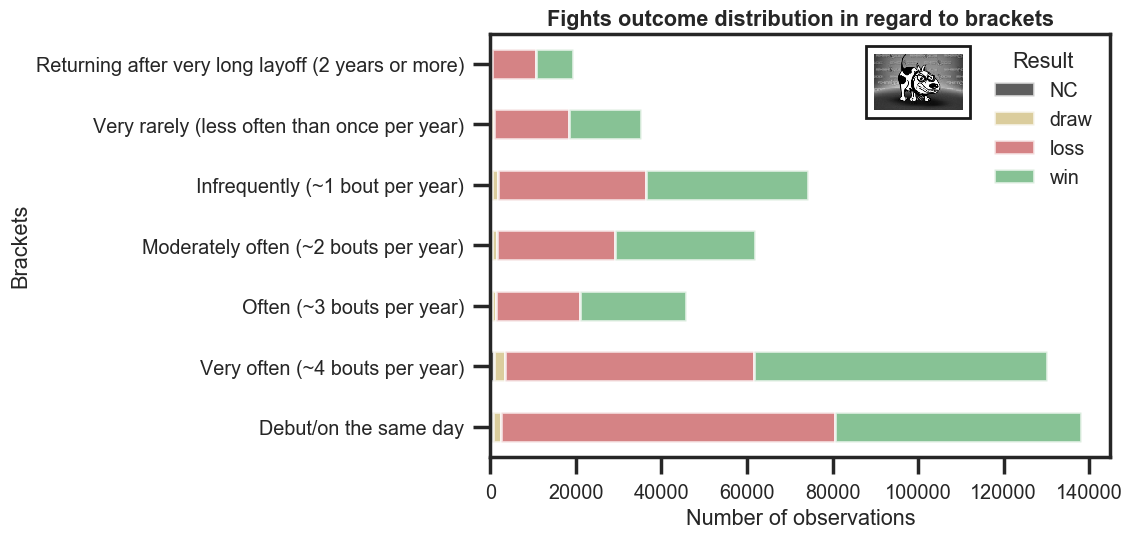

In [40]:
# Chart representing fights outcome distribution in regard to brackets, for all fights recorded in Sherdog's database.
plt.figure(figsize=(10,6), dpi= 100)
plt.style.use('seaborn')
sns.set(style='ticks')
sns.set_context('poster', font_scale = 0.65)
ax = sherdog_cross.plot.barh(stacked=True, alpha=0.7, color=['k', 'y', 'r', 'g'])
ax.set(ylabel='Brackets', xlabel='Number of observations')

sher_logo = mpimg.imread('sherdog.jpg')
imagebox = OffsetImage(sher_logo, zoom=0.32)
ab = AnnotationBbox(imagebox, (100000, 5.7))
ax.add_artist(ab)

plt.title('Fights outcome distribution in regard to brackets', fontweight='bold')
plt.show()

## Segment 3: *Loading, preparing and analyzing UFC roster data*

In [41]:
import re

In [42]:
# Loading data for UFC roster.
ufc_data = pd.read_csv('sherdog-UFC_roster.csv', header=0, sep=";", engine='python')

In [43]:
ufc_data[0:10]

,Fighter,Opponent,Result,Event,Event_date,Method,Referee,Round,Time
0,Shamil Abdurakhimov,Curtis Blaydes,loss,UFC 242 - Khabib vs. Poirier,Sep / 07 / 2019,TKO (Elbow and Punch),Marc Goddard,2,02:22
1,Shamil Abdurakhimov,Marcin Tybura,win,UFC Fight Night 149 - Overeem vs. Oleynik,Apr / 20 / 2019,TKO (Punches),Herb Dean,2,03:15
2,Shamil Abdurakhimov,Andrei Arlovski,win,UFC Fight Night 136 - Hunt vs. Oleynik,Sep / 15 / 2018,Decision (Unanimous),Leon Roberts,3,05:00
3,Shamil Abdurakhimov,Chase Sherman,win,UFC Fight Night 122 - Bisping vs. Gastelum,Nov / 25 / 2017,KO (Punches),Steve Perceval,1,01:24
4,Shamil Abdurakhimov,Derrick Lewis,loss,UFC Fight Night 102 - Lewis vs. Abdurakhimov,Dec / 09 / 2016,TKO (Punches),Dan Miragliotta,4,03:42
5,Shamil Abdurakhimov,Walt Harris,win,UFC Fight Night 96 - Lineker vs. Dodson,Oct / 01 / 2016,Decision (Split),Herb Dean,3,05:00
6,Shamil Abdurakhimov,Anthony Hamilton,win,UFC Fight Night 83 - Cerrone vs. Oliveira,Feb / 21 / 2016,Decision (Unanimous),Chip Snider,3,05:00
7,Shamil Abdurakhimov,Timothy Johnson,loss,UFC Fight Night 63 - Mendes vs. Lamas,Apr / 04 / 2015,TKO (Punches),Mike King,1,04:57
8,Shamil Abdurakhimov,Kenny Garner,win,M-1 Challenge 49 - Battle in the Mountains,Jun / 07 / 2014,Decision (Unanimous),Viktor Korneev,3,05:00
9,Shamil Abdurakhimov,Neil Grove,win,Tech-Krep FC - Southern Front 2,Oct / 04 / 2013,Decision (Unanimous),Ashot Ashughyan,3,05:00


In [44]:
# Creating data frame copy reduced to essential columns.
ufc_selected_data = ufc_data[['Fighter', 'Result', 'Event_date']].copy()

In [45]:
# Checking if there are any missing values in 'Event_date' column.
ufc_selected_data[ufc_selected_data['Event_date'].isna()]

,Fighter,Result,Event_date


In [46]:
# Converting data in 'Event_date' column from string to date.
ufc_converted_dates = []
for i in range(len(ufc_selected_data['Event_date'])):
    ufc_converted_dates.append(parse(ufc_selected_data['Event_date'][i]))

In [47]:
# Assigning converted data to 'Event_date' column.
ufc_selected_data['Event_date'] = ufc_converted_dates

In [48]:
ufc_selected_data[0:10]

,Fighter,Result,Event_date
0,Shamil Abdurakhimov,loss,2019-09-07
1,Shamil Abdurakhimov,win,2019-04-20
2,Shamil Abdurakhimov,win,2018-09-15
3,Shamil Abdurakhimov,win,2017-11-25
4,Shamil Abdurakhimov,loss,2016-12-09
5,Shamil Abdurakhimov,win,2016-10-01
6,Shamil Abdurakhimov,win,2016-02-21
7,Shamil Abdurakhimov,loss,2015-04-04
8,Shamil Abdurakhimov,win,2014-06-07
9,Shamil Abdurakhimov,win,2013-10-04


In [49]:
# Creating time intervals between fights for each fighter.
ufc_intervals = []
for i in range(len(ufc_selected_data['Fighter']) - 1):
    if ufc_selected_data['Fighter'][i] == ufc_selected_data['Fighter'][i + 1]:
        ufc_intervals.append(ufc_selected_data['Event_date'][i] - ufc_selected_data['Event_date'][i + 1])
        ufc_intervals[i] = ufc_intervals[i].days
    else:
        ufc_intervals.append(0)
ufc_intervals.append(0)   # adding last time interval (0) for the last fighter in database.

In [50]:
# Creating new column in data frame and assigning time intervals to it.
ufc_selected_data['Time_interval'] = ufc_intervals

In [51]:
ufc_selected_data[0:10]

,Fighter,Result,Event_date,Time_interval
0,Shamil Abdurakhimov,loss,2019-09-07,140
1,Shamil Abdurakhimov,win,2019-04-20,217
2,Shamil Abdurakhimov,win,2018-09-15,294
3,Shamil Abdurakhimov,win,2017-11-25,351
4,Shamil Abdurakhimov,loss,2016-12-09,69
5,Shamil Abdurakhimov,win,2016-10-01,223
6,Shamil Abdurakhimov,win,2016-02-21,323
7,Shamil Abdurakhimov,loss,2015-04-04,301
8,Shamil Abdurakhimov,win,2014-06-07,246
9,Shamil Abdurakhimov,win,2013-10-04,551


Repeating same actions for UFC roster data - same brackets will be assigned to data in order to make it comparable with previous chapter.

In [52]:
# Preparing brackets and labels for each category and assigning them to cats variable.
bins_ufc = [0, 1, 91, 121, 183, 366, 729, 10000]
group_names = ['Debut/on the same day', 
               'Very often (~4 bouts per year)', 
               'Often (~3 bouts per year)', 
               'Moderately often (~2 bouts per year)', 
               'Infrequently (~1 bout per year)', 
               'Very rarely (less often than once per year)',
               'Returning after very long layoff (2 years or more)']
cats_ufc = pd.cut(ufc_selected_data['Time_interval'], bins_ufc, labels=group_names, right=False)

In [53]:
# Creating and assigning new column with interval categories, to data frame.
ufc_selected_data['Descriptive_interval'] = cats_ufc

In [54]:
ufc_selected_data[0:20]

,Fighter,Result,Event_date,Time_interval,Descriptive_interval
0,Shamil Abdurakhimov,loss,2019-09-07,140,Moderately often (~2 bouts per year)
1,Shamil Abdurakhimov,win,2019-04-20,217,Infrequently (~1 bout per year)
2,Shamil Abdurakhimov,win,2018-09-15,294,Infrequently (~1 bout per year)
3,Shamil Abdurakhimov,win,2017-11-25,351,Infrequently (~1 bout per year)
4,Shamil Abdurakhimov,loss,2016-12-09,69,Very often (~4 bouts per year)
5,Shamil Abdurakhimov,win,2016-10-01,223,Infrequently (~1 bout per year)
6,Shamil Abdurakhimov,win,2016-02-21,323,Infrequently (~1 bout per year)
7,Shamil Abdurakhimov,loss,2015-04-04,301,Infrequently (~1 bout per year)
8,Shamil Abdurakhimov,win,2014-06-07,246,Infrequently (~1 bout per year)
9,Shamil Abdurakhimov,win,2013-10-04,551,Very rarely (less often than once per year)


In [55]:
# Assigning 'Descriptive_interval' column to variable.
ufc_brackets = ufc_selected_data['Descriptive_interval']

In [56]:
# Creating variables where interval data is assigned based on type of fight outcome.
ufc_all_fights_count = ufc_brackets.value_counts()
ufc_win_fights_count = ufc_brackets[ufc_selected_data['Result'] == 'win'].value_counts()
ufc_loss_fights_count = ufc_brackets[ufc_selected_data['Result'] == 'loss'].value_counts()
ufc_draw_fights_count = ufc_brackets[ufc_selected_data['Result'] == 'draw'].value_counts()
ufc_nc_fights_count = ufc_brackets[ufc_selected_data['Result'] == 'NC'].value_counts()

In [57]:
# Sum of all fights stored in UFC roster database.
ufc_all_fights_count.sum()

12979

In [58]:
# Sum of all fights ended with victory and stored in UFC roster database.
ufc_win_fights_count.sum()

9730

In [59]:
# Sum of all fights ended with loss and stored in UFC roster database.
ufc_loss_fights_count.sum()

3063

In [60]:
# Sum of all fights ended with draw and stored in UFC roster database.
ufc_draw_fights_count.sum()

90

In [61]:
# Sum of all fights ended with no-contest and stored in UFC roster database.
ufc_nc_fights_count.sum()

96

In [62]:
# Checking if there are any missing values in 'Descriptive_interval' column.
ufc_selected_data[ufc_selected_data['Descriptive_interval'].isna()]

,Fighter,Result,Event_date,Time_interval,Descriptive_interval


In [63]:
# Data validation - checking if there is any record that was not qualified as either win, loss, draw or no-contest.
ufc_sum_of_brackets = (ufc_win_fights_count.sum() + ufc_loss_fights_count.sum() + ufc_draw_fights_count.sum() + 
ufc_nc_fights_count.sum())

if ufc_all_fights_count.sum() == ufc_sum_of_brackets:
    print('Verification successful!')

Verification successful!


In [64]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
ufc_pct = ufc_win_fights_count/(ufc_win_fights_count + ufc_loss_fights_count)

In [65]:
# Sorting results in ascending order.
ufc_pct_sorted = ufc_pct.sort_values(ascending=False)

In [66]:
# Converting fractions to percentages.
ufc_true_pct = ufc_pct * 100

In [67]:
ufc_pct_sorted

Debut/on the same day                                 0.892052
Returning after very long layoff (2 years or more)    0.830357
Very often (~4 bouts per year)                        0.800858
Often (~3 bouts per year)                             0.742574
Moderately often (~2 bouts per year)                  0.734148
Infrequently (~1 bout per year)                       0.722242
Very rarely (less often than once per year)           0.703540
Name: Descriptive_interval, dtype: float64

There is a striking difference, **ranging from 20 to 30 percentage points** in result ratio of UFC roster and entire database. This should not be a surprise, since UFC is currently treated as best and stacked with highest amount of talented MMA fighters, organization in the world. In this case, it is fair to say, that data goes hand in hand with intuition. MMA enthusiasts around the world know, that most of elite fighters, can be found in UFC.
Another interesting observation applies to debutants - **UFC fighters won over *89%* of fights represented by debut/in the same day bracket, taking into account that over *80%* of these observations were in fact debuts, it is fair to say that more than *70%* fighters under present UFC contract, won their debut in MMA.**

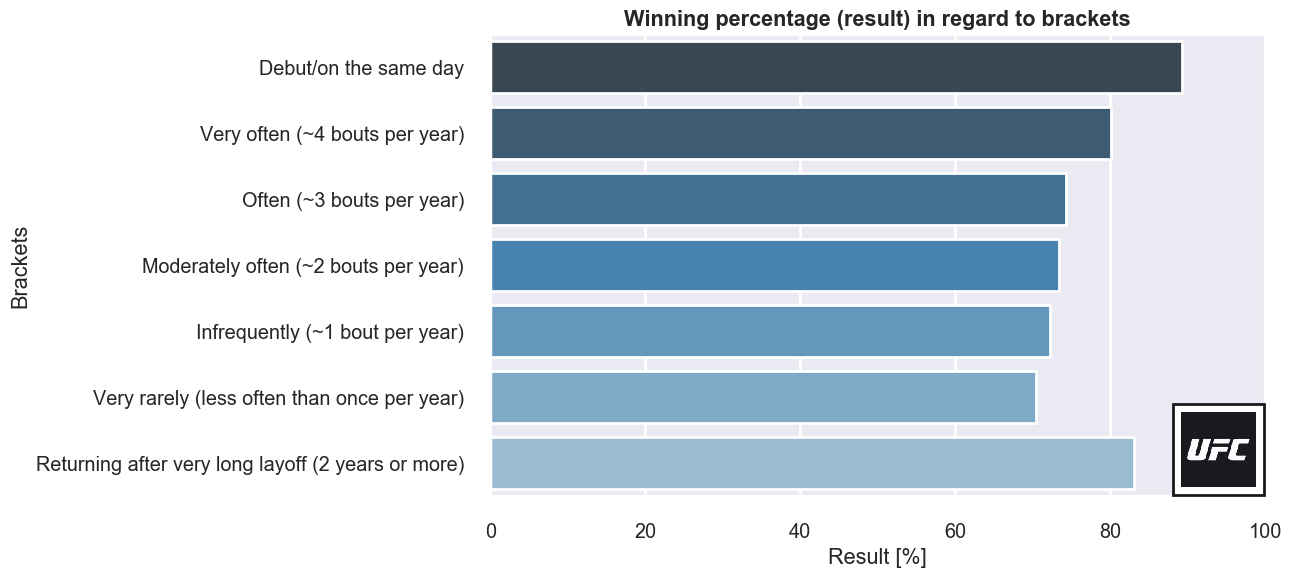

In [68]:
# Chart representing result depicted as percentages in regard to brackets, for all fights recorded in UFC roster database.
plt.figure(figsize=(10,6), dpi= 100)
sns.set(style='darkgrid')
sns.set_context('poster', font_scale = 0.65)
ax = sns.barplot(ufc_true_pct.values, ufc_true_pct.index, palette="Blues_d")
ax.set_xlim(0, 100)
ax.set(xlabel='Result [%]', ylabel='Brackets')

ufc_logo = mpimg.imread('ufc.jpg')
imagebox = OffsetImage(ufc_logo, zoom=0.3)
ab = AnnotationBbox(imagebox, (94, 5.8))
ax.add_artist(ab)

plt.title('Winning percentage (result) in regard to brackets', fontweight='bold')
plt.show()

In [69]:
# Total amount of observations for each bracket.
ufc_all_fights_count

Very often (~4 bouts per year)                        3547
Moderately often (~2 bouts per year)                  3065
Infrequently (~1 bout per year)                       2861
Often (~3 bouts per year)                             1851
Debut/on the same day                                  851
Very rarely (less often than once per year)            689
Returning after very long layoff (2 years or more)     115
Name: Descriptive_interval, dtype: int64

I have to admit, that it is quite interesting, that fighters returning after very long layoff scored such a high result. Let us examine why this can be a thing. First of all, there are only 115 observations recorded for this bracket. It represents less than *1%* of all observations collected for UFC roster. It is worth mentioning, that for Sherdog database this bracket was representing almost *4%* of the total. Considering the above, i suggest to be very careful with drawing conclusions here.

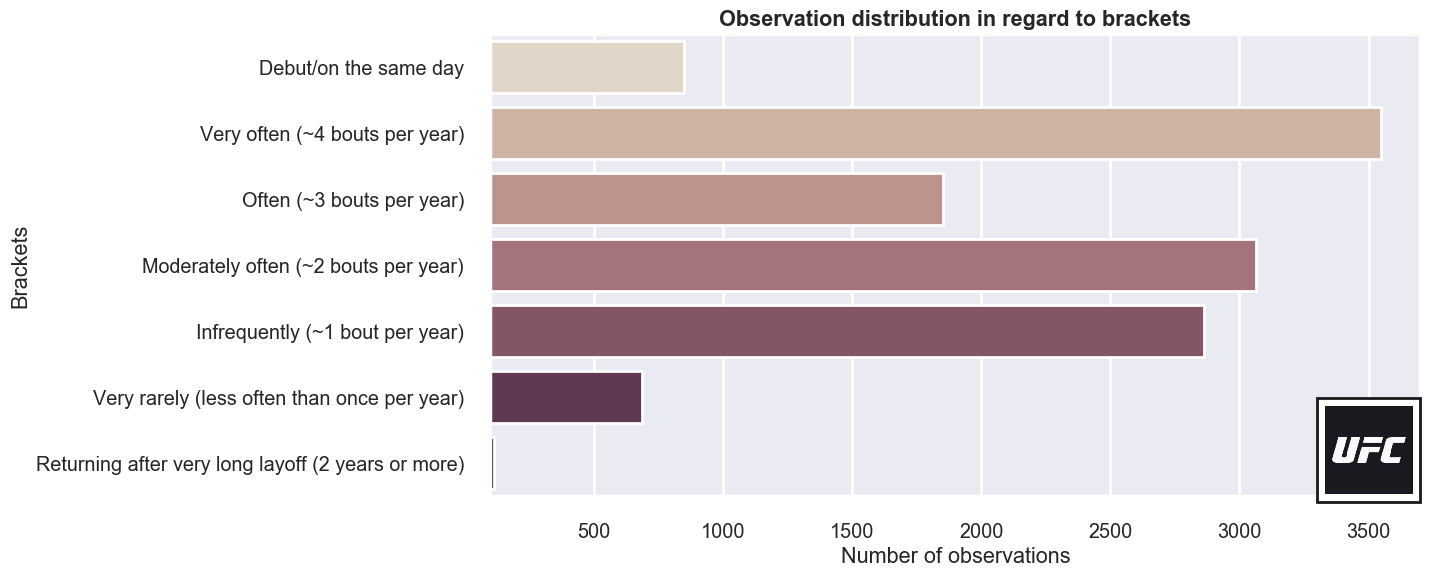

In [70]:
# Chart representing number of observations in regard to brackets, for all fights recorded in UFC roster database.
plt.figure(figsize=(12,6), dpi= 100)
sns.set(style='darkgrid')
sns.set_context('poster', font_scale = 0.65)
ax = sns.barplot(ufc_all_fights_count.values, ufc_all_fights_count.index, palette="ch:.25")
ax.set_xlim(100, 3700)
ax.set(xlabel='Number of observations', ylabel='Brackets')

ufc_logo = mpimg.imread('ufc.jpg')
imagebox = OffsetImage(ufc_logo, zoom=0.35)
ab = AnnotationBbox(imagebox, (3500, 5.8))
ax.add_artist(ab)

plt.title('Observation distribution in regard to brackets', fontweight='bold')
plt.show()

In [71]:
# Ratio of 'Returning after very long layoff (2 years or more)' bracket and all recorded fights in UFC roster database.
ufc_all_fights_count[6] / ufc_all_fights_count.sum()

0.008860466908082287

In [72]:
# Ratio of 'Returning after very long layoff (2 years or more)' bracket and all recorded fights in Sherdog database.
all_fights_count[6] / all_fights_count.sum()

0.03811463139465487

For brackets that are representing range from 1 to 3 bouts per year there are only minor differences between results (difference is not exceeding *2 percentage points*). It resembles results for Sherdog database in regard to these categories, although, as it was previously mentioned, results for UFC roster are respectively higher. **We can safely conclude, that fighting with frequency corresponding to one, two or three bouts per year, will not have any significant positive, or negative impact on results.** Conclusion is applicable to all fighters (Sherdog database) as well as to UFC roster.

Most frequent category looks quite interesting, it scored 6 percentage points higher result, than intervals between 1-3 bouts per year. This was not the case for whole database though. Does it mean, that UFC fighters should fight more often to increase their chances of winning? Not necessarily, one possible explanation might be connected with strategy, that was used by many fighters approaching UFC contract. This strategy was relying on getting as much fights as possible, with relatively low skilled opponents. Strategy basically came down to winning as many fights as possible, regardless of opponent's skill level. As it was disclosed by many managers - UFC was rewarding quantity over quality.

That seems like a good reason to dive into UFC roster data, narrowing down results to fights, **that have happened inside UFC**. Hopefully, this can put some light on this issue by eliminating 'skill difference' factor.

In [73]:
# Creating cross-table for the sake of visualization fights outcome distribution.
ufc_cross = pd.crosstab(ufc_selected_data['Descriptive_interval'], ufc_selected_data['Result'])

<Figure size 900x600 with 0 Axes>

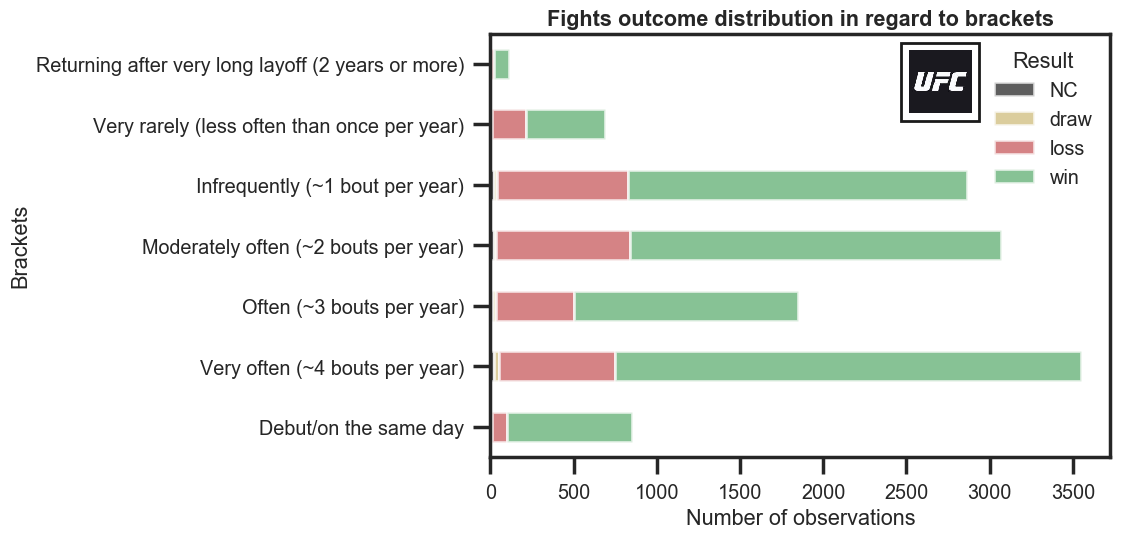

In [74]:
# Chart representing fights outcome distribution in regard to brackets, for all fights recorded in UFC roster database.
plt.figure(figsize=(9,6), dpi= 100)
plt.style.use('seaborn')
sns.set(style='ticks')
sns.set_context('poster', font_scale = 0.65)
ax = ufc_cross.plot.barh(stacked=True, alpha=0.7, color=['k', 'y', 'r', 'g'])
ax.set(ylabel='Brackets', xlabel='Number of observations')

ufc_logo = mpimg.imread('ufc.jpg')
imagebox = OffsetImage(ufc_logo, zoom=0.25)
ab = AnnotationBbox(imagebox, (2700, 5.7))
ax.add_artist(ab)

plt.title('Fights outcome distribution in regard to brackets', fontweight='bold')
plt.show()

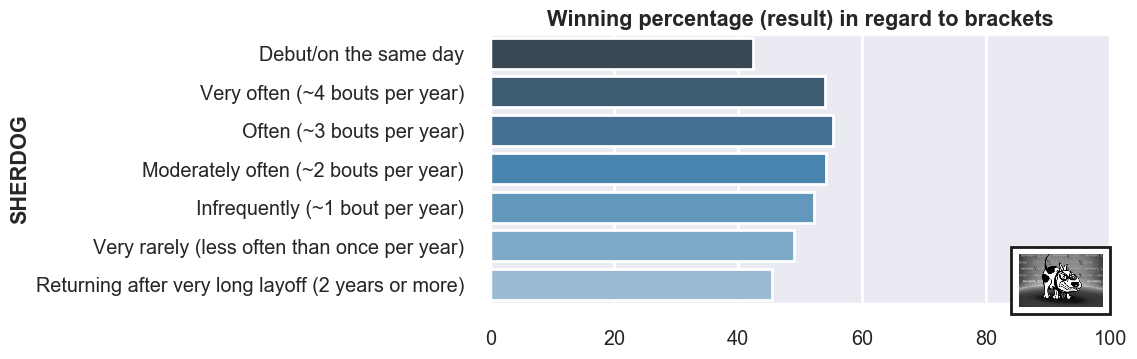

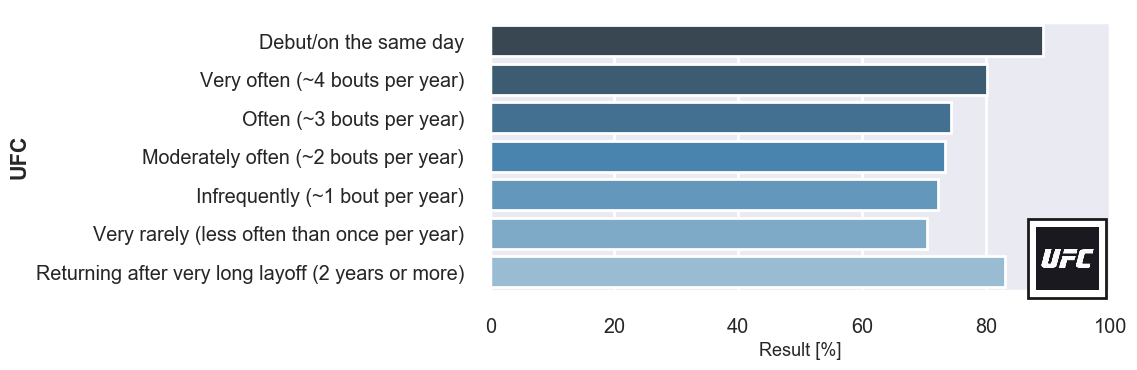

In [75]:
# Comparing charts representing result depicted as percentages in regard to brackets, for all fights recorded 
# in UFC roster and Sherdog's databases.
sns.set(style='darkgrid')
sns.set_context('poster', font_scale = 0.65)

plt.figure(figsize=(8,3.5), dpi= 100)

ax1 = sns.barplot(sherdog_true_pct.values, sherdog_true_pct.index, palette="Blues_d")
ax1.set_xlim(0, 100)
ax1.set_ylabel('SHERDOG', fontweight='heavy')

imagebox = OffsetImage(sher_logo, zoom=0.3)
ab = AnnotationBbox(imagebox, (92, 5.9))
ax1.add_artist(ab)

plt.figure(figsize=(8,3.5), dpi= 100)
ax2 = sns.barplot(ufc_true_pct.values, ufc_true_pct.index, palette="Blues_d")
ax2.set_xlim(0, 100)
ax2.set_xlabel('Result [%]', fontsize='smaller')
ax2.set_ylabel('UFC', fontweight='heavy')

imagebox = OffsetImage(ufc_logo, zoom=0.25)
ab2 = AnnotationBbox(imagebox, (93, 5.65))
ax2.add_artist(ab2)

ax1.set_title('Winning percentage (result) in regard to brackets', fontweight='bold')
plt.show()

## Segment 4: *Analyzing UFC roster in regard to fights, that exclusively took place inside UFC, gender and weight classes breakdown*

In [76]:
# Creating copy of 'Event' table from UFC roster data frame.
ufc_selected_data['Event'] = ufc_data['Event'].copy()

In [77]:
ufc_selected_data[0:10]

,Fighter,Result,Event_date,Time_interval,Descriptive_interval,Event
0,Shamil Abdurakhimov,loss,2019-09-07,140,Moderately often (~2 bouts per year),UFC 242 - Khabib vs. Poirier
1,Shamil Abdurakhimov,win,2019-04-20,217,Infrequently (~1 bout per year),UFC Fight Night 149 - Overeem vs. Oleynik
2,Shamil Abdurakhimov,win,2018-09-15,294,Infrequently (~1 bout per year),UFC Fight Night 136 - Hunt vs. Oleynik
3,Shamil Abdurakhimov,win,2017-11-25,351,Infrequently (~1 bout per year),UFC Fight Night 122 - Bisping vs. Gastelum
4,Shamil Abdurakhimov,loss,2016-12-09,69,Very often (~4 bouts per year),UFC Fight Night 102 - Lewis vs. Abdurakhimov
5,Shamil Abdurakhimov,win,2016-10-01,223,Infrequently (~1 bout per year),UFC Fight Night 96 - Lineker vs. Dodson
6,Shamil Abdurakhimov,win,2016-02-21,323,Infrequently (~1 bout per year),UFC Fight Night 83 - Cerrone vs. Oliveira
7,Shamil Abdurakhimov,loss,2015-04-04,301,Infrequently (~1 bout per year),UFC Fight Night 63 - Mendes vs. Lamas
8,Shamil Abdurakhimov,win,2014-06-07,246,Infrequently (~1 bout per year),M-1 Challenge 49 - Battle in the Mountains
9,Shamil Abdurakhimov,win,2013-10-04,551,Very rarely (less often than once per year),Tech-Krep FC - Southern Front 2


In [78]:
# Assigning columns sequence to variable.
columns_ufc = ufc_selected_data.columns.tolist()

In [79]:
columns_ufc

['Fighter',
 'Result',
 'Event_date',
 'Time_interval',
 'Descriptive_interval',
 'Event']

In [80]:
# Changing sequence of columns in data frame.
columns_ufc = [columns_ufc[0], columns_ufc[1], columns_ufc[-1], columns_ufc[2], columns_ufc[3], columns_ufc[4]]

In [81]:
# Replacing sequence of columns in data frame with new sequence.
ufc_selected_data = ufc_selected_data[columns_ufc]

In [82]:
ufc_selected_data[0:10]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval
0,Shamil Abdurakhimov,loss,UFC 242 - Khabib vs. Poirier,2019-09-07,140,Moderately often (~2 bouts per year)
1,Shamil Abdurakhimov,win,UFC Fight Night 149 - Overeem vs. Oleynik,2019-04-20,217,Infrequently (~1 bout per year)
2,Shamil Abdurakhimov,win,UFC Fight Night 136 - Hunt vs. Oleynik,2018-09-15,294,Infrequently (~1 bout per year)
3,Shamil Abdurakhimov,win,UFC Fight Night 122 - Bisping vs. Gastelum,2017-11-25,351,Infrequently (~1 bout per year)
4,Shamil Abdurakhimov,loss,UFC Fight Night 102 - Lewis vs. Abdurakhimov,2016-12-09,69,Very often (~4 bouts per year)
5,Shamil Abdurakhimov,win,UFC Fight Night 96 - Lineker vs. Dodson,2016-10-01,223,Infrequently (~1 bout per year)
6,Shamil Abdurakhimov,win,UFC Fight Night 83 - Cerrone vs. Oliveira,2016-02-21,323,Infrequently (~1 bout per year)
7,Shamil Abdurakhimov,loss,UFC Fight Night 63 - Mendes vs. Lamas,2015-04-04,301,Infrequently (~1 bout per year)
8,Shamil Abdurakhimov,win,M-1 Challenge 49 - Battle in the Mountains,2014-06-07,246,Infrequently (~1 bout per year)
9,Shamil Abdurakhimov,win,Tech-Krep FC - Southern Front 2,2013-10-04,551,Very rarely (less often than once per year)


In [83]:
# Creating variable and assigning fights that took place exclusively inside UFC.
ufc_events_only = ufc_selected_data[ufc_selected_data['Event'].str.contains("^UFC\s", flags=re.IGNORECASE, regex=True)].copy()

In [84]:
ufc_events_only[0:20]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval
0,Shamil Abdurakhimov,loss,UFC 242 - Khabib vs. Poirier,2019-09-07,140,Moderately often (~2 bouts per year)
1,Shamil Abdurakhimov,win,UFC Fight Night 149 - Overeem vs. Oleynik,2019-04-20,217,Infrequently (~1 bout per year)
2,Shamil Abdurakhimov,win,UFC Fight Night 136 - Hunt vs. Oleynik,2018-09-15,294,Infrequently (~1 bout per year)
3,Shamil Abdurakhimov,win,UFC Fight Night 122 - Bisping vs. Gastelum,2017-11-25,351,Infrequently (~1 bout per year)
4,Shamil Abdurakhimov,loss,UFC Fight Night 102 - Lewis vs. Abdurakhimov,2016-12-09,69,Very often (~4 bouts per year)
5,Shamil Abdurakhimov,win,UFC Fight Night 96 - Lineker vs. Dodson,2016-10-01,223,Infrequently (~1 bout per year)
6,Shamil Abdurakhimov,win,UFC Fight Night 83 - Cerrone vs. Oliveira,2016-02-21,323,Infrequently (~1 bout per year)
7,Shamil Abdurakhimov,loss,UFC Fight Night 63 - Mendes vs. Lamas,2015-04-04,301,Infrequently (~1 bout per year)
25,Klidson Abreu,loss,UFC Fight Night 163 - Magomedsharipov vs. Kattar,2019-11-09,112,Often (~3 bouts per year)
26,Klidson Abreu,win,UFC on ESPN 4 - Dos Anjos vs. Edwards,2019-07-20,147,Moderately often (~2 bouts per year)


In [85]:
# Assigning 'Descriptive_interval' column to variable.
ufc_events_brackets = ufc_events_only['Descriptive_interval']

In [86]:
# Creating variables where interval data is assigned based on type of fight outcome.
ufc_events_all_fights_count = ufc_events_brackets.value_counts()
ufc_events_win_fights_count = ufc_events_brackets[ufc_events_only['Result'] == 'win'].value_counts()
ufc_events_loss_fights_count = ufc_events_brackets[ufc_events_only['Result'] == 'loss'].value_counts()
ufc_events_draw_fights_count = ufc_events_brackets[ufc_events_only['Result'] == 'draw'].value_counts()
ufc_events_nc_fights_count = ufc_events_brackets[ufc_events_only['Result'] == 'NC'].value_counts()

In [87]:
# Sum of all fights that took place inside UFC in regard to UFC roster database.
ufc_events_all_fights_count.sum()

4755

In [88]:
# Sum of all fights that took place inside UFC and ended up with victory in regard to UFC roster database.
ufc_events_win_fights_count.sum()

2796

In [89]:
# Sum of all fights that took place inside UFC and ended up with loss in regard to UFC roster database.
ufc_events_loss_fights_count.sum()

1889

In [90]:
# Sum of all fights that took place inside UFC and ended up with draw in regard to UFC roster database.
ufc_events_draw_fights_count.sum()

28

In [91]:
# Sum of all fights that took place inside UFC and ended up as no-contest in regard to UFC roster database.
ufc_events_nc_fights_count.sum()

42

In [92]:
# Checking if there are any missing values in 'Descriptive_interval' column.
ufc_events_only[ufc_events_only['Descriptive_interval'].isna()]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval


In [93]:
# Data validation - checking if there is any record that was not qualified as either win, loss, draw or no-contest.
ufc_events_sum_of_brackets = (ufc_events_win_fights_count.sum() + ufc_events_loss_fights_count.sum() + 
ufc_events_draw_fights_count.sum() + ufc_events_nc_fights_count.sum())

if ufc_events_all_fights_count.sum() == ufc_events_sum_of_brackets:
    print('Verification successful!')

Verification successful!


In [94]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
ufc_events_pct = ufc_events_win_fights_count/(ufc_events_win_fights_count + ufc_events_loss_fights_count)

In [95]:
# Sorting results in ascending order.
ufc_events_pct_sorted = ufc_events_pct.sort_values(ascending=False)

In [96]:
ufc_events_pct_sorted

Returning after very long layoff (2 years or more)    0.666667
Infrequently (~1 bout per year)                       0.616059
Moderately often (~2 bouts per year)                  0.610892
Often (~3 bouts per year)                             0.582744
Very often (~4 bouts per year)                        0.555172
Very rarely (less often than once per year)           0.544413
Debut/on the same day                                 0.000000
Name: Descriptive_interval, dtype: float64

In [97]:
ufc_events_all_fights_count

Moderately often (~2 bouts per year)                  1542
Infrequently (~1 bout per year)                       1504
Often (~3 bouts per year)                              721
Very often (~4 bouts per year)                         587
Very rarely (less often than once per year)            355
Returning after very long layoff (2 years or more)      45
Debut/on the same day                                    1
Name: Descriptive_interval, dtype: int64

As it turns out, highest result can be attributed to category labeled as 'Returning after very long layoff (2 years or more)'. This finding raises many questions, is 'ring rust' not a thing? Does fighter benefit from very long layoff and if so, why is that? Does fighter receive any special treatment when it comes to matchmaking, after coming back from very long layoff? We can not rule out, that indeed, fighters in this group were being matched with 'easier' or 'less skilled' opponents, than they would have had otherwise. The analysis is not providing any kind of opponent distinction or rating, which possibly can be helpful in edge cases, like the on we have just encountered. That being said, the amount of data we are working with should enable further inference in regard to more centric intervals.

We can observe, that result for intervals between 1 and 2 fights per year is almost identical and category corresponding to frequency of 3 bouts per year, does not fall behind (*difference is lower than 3 percentage points*). **These results are overlapping findings for the whole UFC roster dataset**. It is fair to say, that we have **legitimized following conclusion:**

*'...fighting with frequency corresponding to one, two or three bouts per year, will not have any significant positive, or negative impact on results.'*

There is very interesting dynamic happening in regard to the category which represents highest frequency. One of the reasons for diving into data constrained by fights that have happened inside UFC, was a hunch, that the high result scored by this interval, was mostly dictated by bouts, that have happened before fighter joined UFC. 'Very often' interval scored 6 percentage points higher result, than intervals ranging from 1 to 3 bouts per year. We can see that situation has reversed and this frequency is now *6 percentage points* below 1-3 intervals. It looks like fighting that often is not the best strategy result-wise for fighters that are already in UFC.

Bracket representing very rare frequency (less often than once per year), scored once again the lowest result. It is fair to conclude, that **fighting within this time interval is making positive result less likely to happen for UFC roster fighters.**

As we can see debut category is no longer relevant in the view of current constraints - there is only one fight that belongs to this category - CM Punk's debut. Unsurprisingly, bout ended with debutant's loss.

Additionally, we have confirmed that fighting frequency between 1 and 2 fights per year is not only desirable frequency from UFC's schedule perspective, but in fact, the most common frequency for UFC fights in regard to UFC roster.

In [98]:
ufc_events_only[ufc_events_only['Descriptive_interval'] == 'Debut/on the same day']

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval
8396,Phil Brooks,loss,UFC 203 - Miocic vs. Overeem,2016-09-10,0,Debut/on the same day


In [99]:
# Converting fractions to percentages.
ufc_events_true_pct = ufc_events_pct * 100

In [100]:
# Creating cross-table for the sake of visualization fights outcome distribution.
ufc_events_cross = pd.crosstab(ufc_events_only['Descriptive_interval'], ufc_events_only['Result'])

<Figure size 1200x600 with 0 Axes>

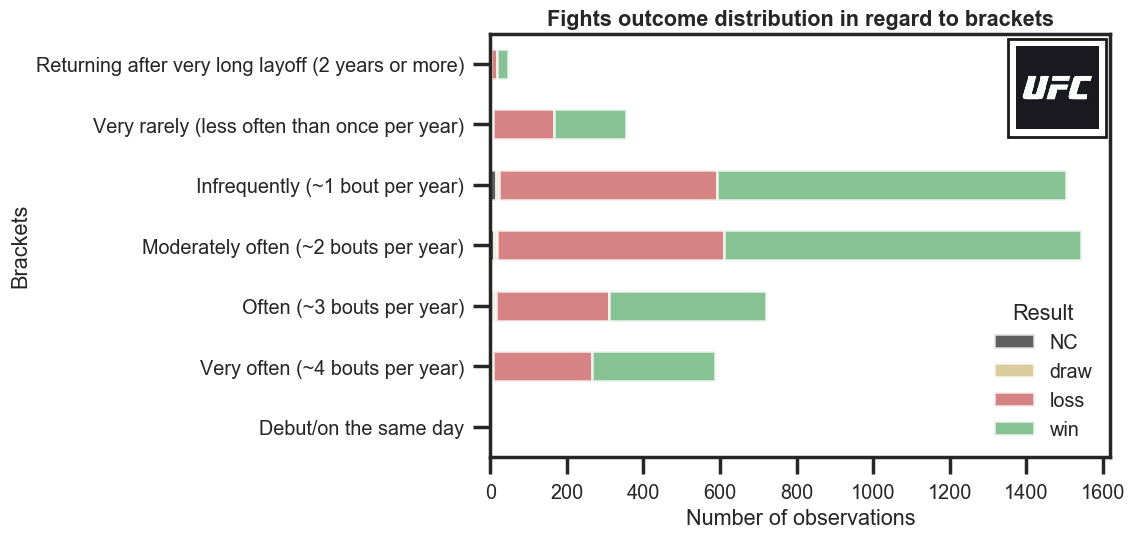

In [101]:
# Chart representing fights outcome distribution in regard to brackets, for all fights inside UFC recorded for UFC roster.
plt.figure(figsize=(12,6), dpi= 100)
sns.set(style='ticks')
sns.set_context('poster', font_scale = 0.65)
ax = ufc_events_cross.plot.barh(stacked=True, alpha=0.7, color=['k', 'y', 'r', 'g'])
ax.set(ylabel='Brackets', xlabel='Number of observations')

ufc_logo = mpimg.imread('ufc.jpg')
imagebox = OffsetImage(ufc_logo, zoom=0.33)
ab = AnnotationBbox(imagebox, (1480, 5.6))
ax.add_artist(ab)

plt.title('Fights outcome distribution in regard to brackets', fontweight='bold')
plt.show()

In [102]:
# Loading additional data for UFC roster (division, nickname).
roster = pd.read_csv('ufc-roster_v3.csv', header=0, sep=",", engine='python')

In [103]:
roster[0:10]

,Name,Division,Nickname
0,Shamil Abdurakhimov,Heavyweight,Abrek
1,Klidson Abreu,Light Heavyweight,White Bear
2,Juan Adams,Heavyweight,The Kraken
3,Israel Adesanya,Middleweight,The Last Stylebender
4,Kevin Aguilar,Featherweight,Angel of Death
5,Omari Akhmedov,Middleweight,Wolverine
6,Rostem Akman,Welterweight,NaN
7,Heili Alateng,Bantamweight,The Mongolian Knight
8,Junior Albini,Heavyweight,Baby
9,Iuri Alcantara,Bantamweight,Marajo


In [104]:
# Unifying fighter's name in both data frames.
ufc_events_only.loc[:, ['Fighter']] = ufc_events_only['Fighter'].str.upper()
roster.loc[:, 'Name'] = roster['Name'].str.upper()

In [105]:
ufc_events_only[0:10]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval
0,SHAMIL ABDURAKHIMOV,loss,UFC 242 - Khabib vs. Poirier,2019-09-07,140,Moderately often (~2 bouts per year)
1,SHAMIL ABDURAKHIMOV,win,UFC Fight Night 149 - Overeem vs. Oleynik,2019-04-20,217,Infrequently (~1 bout per year)
2,SHAMIL ABDURAKHIMOV,win,UFC Fight Night 136 - Hunt vs. Oleynik,2018-09-15,294,Infrequently (~1 bout per year)
3,SHAMIL ABDURAKHIMOV,win,UFC Fight Night 122 - Bisping vs. Gastelum,2017-11-25,351,Infrequently (~1 bout per year)
4,SHAMIL ABDURAKHIMOV,loss,UFC Fight Night 102 - Lewis vs. Abdurakhimov,2016-12-09,69,Very often (~4 bouts per year)
5,SHAMIL ABDURAKHIMOV,win,UFC Fight Night 96 - Lineker vs. Dodson,2016-10-01,223,Infrequently (~1 bout per year)
6,SHAMIL ABDURAKHIMOV,win,UFC Fight Night 83 - Cerrone vs. Oliveira,2016-02-21,323,Infrequently (~1 bout per year)
7,SHAMIL ABDURAKHIMOV,loss,UFC Fight Night 63 - Mendes vs. Lamas,2015-04-04,301,Infrequently (~1 bout per year)
25,KLIDSON ABREU,loss,UFC Fight Night 163 - Magomedsharipov vs. Kattar,2019-11-09,112,Often (~3 bouts per year)
26,KLIDSON ABREU,win,UFC on ESPN 4 - Dos Anjos vs. Edwards,2019-07-20,147,Moderately often (~2 bouts per year)


In [106]:
roster[0:10]

,Name,Division,Nickname
0,SHAMIL ABDURAKHIMOV,Heavyweight,Abrek
1,KLIDSON ABREU,Light Heavyweight,White Bear
2,JUAN ADAMS,Heavyweight,The Kraken
3,ISRAEL ADESANYA,Middleweight,The Last Stylebender
4,KEVIN AGUILAR,Featherweight,Angel of Death
5,OMARI AKHMEDOV,Middleweight,Wolverine
6,ROSTEM AKMAN,Welterweight,NaN
7,HEILI ALATENG,Bantamweight,The Mongolian Knight
8,JUNIOR ALBINI,Heavyweight,Baby
9,IURI ALCANTARA,Bantamweight,Marajo


In [107]:
# Merging both data frames.
ufc_events_only_div = pd.merge(ufc_events_only, roster, left_on='Fighter', 
                               right_on='Name', how='left').drop(['Name', 'Nickname'], axis=1)

In [108]:
ufc_events_only_div[0:10]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval,Division
0,SHAMIL ABDURAKHIMOV,loss,UFC 242 - Khabib vs. Poirier,2019-09-07,140,Moderately often (~2 bouts per year),Heavyweight
1,SHAMIL ABDURAKHIMOV,win,UFC Fight Night 149 - Overeem vs. Oleynik,2019-04-20,217,Infrequently (~1 bout per year),Heavyweight
2,SHAMIL ABDURAKHIMOV,win,UFC Fight Night 136 - Hunt vs. Oleynik,2018-09-15,294,Infrequently (~1 bout per year),Heavyweight
3,SHAMIL ABDURAKHIMOV,win,UFC Fight Night 122 - Bisping vs. Gastelum,2017-11-25,351,Infrequently (~1 bout per year),Heavyweight
4,SHAMIL ABDURAKHIMOV,loss,UFC Fight Night 102 - Lewis vs. Abdurakhimov,2016-12-09,69,Very often (~4 bouts per year),Heavyweight
5,SHAMIL ABDURAKHIMOV,win,UFC Fight Night 96 - Lineker vs. Dodson,2016-10-01,223,Infrequently (~1 bout per year),Heavyweight
6,SHAMIL ABDURAKHIMOV,win,UFC Fight Night 83 - Cerrone vs. Oliveira,2016-02-21,323,Infrequently (~1 bout per year),Heavyweight
7,SHAMIL ABDURAKHIMOV,loss,UFC Fight Night 63 - Mendes vs. Lamas,2015-04-04,301,Infrequently (~1 bout per year),Heavyweight
8,KLIDSON ABREU,loss,UFC Fight Night 163 - Magomedsharipov vs. Kattar,2019-11-09,112,Often (~3 bouts per year),Light Heavyweight
9,KLIDSON ABREU,win,UFC on ESPN 4 - Dos Anjos vs. Edwards,2019-07-20,147,Moderately often (~2 bouts per year),Light Heavyweight


In [109]:
# Checking if there are any missing values in 'Division' column.
'''
There is one missing value - it appears, that there is no info regarding weight class for this fighter on UFC's site, from where
the data was collected. This row will be omitted in further analysis.
'''

ufc_events_only_div[ufc_events_only_div['Division'].isna() == True]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval,Division
4274,ARIANE CARNELOSSI,loss,UFC Fight Night 159 - Rodriguez vs. Stephens,2019-09-21,120,Often (~3 bouts per year),NaN


In [110]:
# Creating class in support of storing weight divisions data.
class WeightDivision(object):
    def __init__(self, name, gender):
        self.name = name
        self.gender = gender
        
        self.frame = None
        self.all_fights_counts = None
        self.win_fights_counts = None
        self.loss_fights_counts = None
        self.draw_fights_counts = None
        self.nc_fights_counts = None
    
    def set_frame(self):
        self.frame = ufc_events_only_div[ufc_events_only_div['Division'] == self.name]
    
    def set_fights_counts(self):
        column = self.frame['Descriptive_interval']
        
        self.all_fights_counts = column.value_counts()
        self.win_fights_counts = column[self.frame['Result'] == 'win'].value_counts()
        self.loss_fights_counts = column[self.frame['Result'] == 'loss'].value_counts()
        self.draw_fights_counts = column[self.frame['Result'] == 'draw'].value_counts()
        self.nc_fights_counts = column[self.frame['Result'] == 'NC'].value_counts()

In [111]:
# Dictionary that stores division and gender info.
weightclass_info = {
    'HW_div': ("Heavyweight", "M"),
    'LHW_div': ("Light Heavyweight", "M"),
    'MW_div': ("Middleweight", "M"),
    'WW_div': ("Welterweight", "M"),
    'LW_div': ("Lightweight", "M"),
    'FW_div': ("Featherweight", "M"),
    'BW_div': ("Bantamweight", "M"),
    'FLW_div': ("Flyweight", "M"),
    'WSW_div': ("Women's Strawweight", "F"),
    'WFLW_div': ("Women's Flyweight", "F"),
    'WBW_div': ("Women's Bantamweight", "F"),
    'WFW_div': ("Women's Featherweight", "F")
    
}

In [112]:
# Creating weight-divisions as class instances and appending them to the list.
weightclass_obj_list = []
for weightclass in weightclass_info.keys():
    obj = WeightDivision(weightclass_info[weightclass][0], (weightclass_info[weightclass][1]))
    obj.set_frame()
    obj.set_fights_counts()
    weightclass_obj_list.append(obj)

In [113]:
# Creating lists that are containing information regarding each division (amount of fights, wins, losses, draws, nc) 
# with gender breakdown.
mens_info = [0, 0, 0, 0, 0]
womens_info = [0, 0, 0, 0, 0]
for weightclass in weightclass_obj_list:
    all_counts = weightclass.all_fights_counts
    win_counts = weightclass.win_fights_counts
    loss_counts = weightclass.loss_fights_counts
    draw_counts = weightclass.draw_fights_counts
    nc_counts = weightclass.nc_fights_counts
    if weightclass.gender == 'M':
        mens_info[0] += all_counts
        mens_info[1] += win_counts
        mens_info[2] += loss_counts
        mens_info[3] += draw_counts
        mens_info[4] += nc_counts
    elif weightclass.gender == 'F':
        womens_info[0] += all_counts
        womens_info[1] += win_counts
        womens_info[2] += loss_counts
        womens_info[3] += draw_counts
        womens_info[4] += nc_counts

In [114]:
# Data validation - checking if sum of all records in data frame connected to each weight-class is equal to
# information stored in 'all fights' variable, for each class instance.
index = 0
df_sum = 0
obj_sum = 0
for weightclass in weightclass_info.keys():
    section = ufc_events_only_div[ufc_events_only_div['Division'] == weightclass_info[weightclass][0]]
    if len(section) == weightclass_obj_list[index].all_fights_counts.sum():
        df_sum += len(section)
        obj_sum += weightclass_obj_list[index].all_fights_counts.sum()
        print(f'Verification of {weightclass_obj_list[index].name} successful.')
    else:
        print(f'Verification of  {weightclass_obj_list[index].name} has failed!')
    index += 1

Verification of Heavyweight successful.
Verification of Light Heavyweight successful.
Verification of Middleweight successful.
Verification of Welterweight successful.
Verification of Lightweight successful.
Verification of Featherweight successful.
Verification of Bantamweight successful.
Verification of Flyweight successful.
Verification of Women's Strawweight successful.
Verification of Women's Flyweight successful.
Verification of Women's Bantamweight successful.
Verification of Women's Featherweight successful.


In [115]:
# Assigning result for all men (percentage ratio between amount of wins and total amount of wins and losses) to variable.
male_pct = mens_info[1]/(mens_info[1] + mens_info[2])

In [116]:
# Sorting results in ascending order.
male_pct_sorted = male_pct.sort_values(ascending=False)

In [117]:
male_pct_sorted

Returning after very long layoff (2 years or more)    0.638889
Infrequently (~1 bout per year)                       0.619455
Moderately often (~2 bouts per year)                  0.616012
Often (~3 bouts per year)                             0.594679
Very often (~4 bouts per year)                        0.564246
Very rarely (less often than once per year)           0.547368
Debut/on the same day                                 0.000000
Name: Descriptive_interval, dtype: float64

In [118]:
# Total amount of observations for men fighting inside UFC in regard to brackets.
mens_info[0]

Moderately often (~2 bouts per year)                  1365
Infrequently (~1 bout per year)                       1307
Often (~3 bouts per year)                              652
Very often (~4 bouts per year)                         542
Very rarely (less often than once per year)            291
Returning after very long layoff (2 years or more)      39
Debut/on the same day                                    1
Name: Descriptive_interval, dtype: int64

In [119]:
# Assigning result for all women (percentage ratio between amount of wins and total amount of wins and losses) to variable.
female_pct = womens_info[1]/(womens_info[1] + womens_info[2])

In [120]:
# Sorting results in ascending order.
female_pct_sorted = female_pct.sort_values(ascending=False)

In [121]:
female_pct_sorted

Returning after very long layoff (2 years or more)    0.833333
Infrequently (~1 bout per year)                       0.596939
Moderately often (~2 bouts per year)                  0.568966
Very rarely (less often than once per year)           0.539683
Often (~3 bouts per year)                             0.477612
Very often (~4 bouts per year)                        0.441860
Debut/on the same day                                      NaN
Name: Descriptive_interval, dtype: float64

In [122]:
# Total amount of observations for women fighting inside UFC in regard to brackets.
womens_info[0]

Moderately often (~2 bouts per year)                  176
Infrequently (~1 bout per year)                       196
Often (~3 bouts per year)                              68
Very rarely (less often than once per year)            63
Very often (~4 bouts per year)                         45
Returning after very long layoff (2 years or more)      6
Debut/on the same day                                   0
Name: Descriptive_interval, dtype: int64

Analysis outcome for all men fighting inside UFC in regard to brackets is essentially similar to previous one, which was executed without any breakdown. Intervals between 1 and 3 fights per year are presenting approximate, high results, whereas the worst result was once again taken by bracket labeled as *'Very rarely (less often than once per year)'*. Interval corresponding to frequency of 4 fights per year also scored quite low result, as it was the case for previous analysis. Fighters returning after very long layoff scored the highest result, which was discussed broadly before. It is worth noticing though, that the result fell by *3 percentage points*.

Speaking about women fighting inside UFC, i would like to begin by paying attention to the fact, that there is a significantly lower amount of observations, than for men. Highest result was obtained by fighters, that were returning after very long layoff. At the first glance, it might look like the result ia astronomically high (*83%*), nonetheless it was based only on 6 observations.

Category corresponding to 1 fight per year and one, that is representing 2 fights per year frequency, scored high results (*above 55%*), while 3 bouts per year bracket, scored surprisingly low result - below *48%*. Women that were fighting with highest frequency (~4 bouts per year) received the lowest score (*44%*). We can observe interesting dynamic when it comes to category '*Very rarely (less often than once per year)*' - result for women is relatively high (*53%*) and it is ranked just below 1-2 bouts per year intervals. It was the category with the lowest result in men analysis.

Based on number of observations and results, **we can conclude that women who are fighting less often, are having higher chance of winning, while intervals between 1 and 2 bouts per year can be described as optimal**, for both, men and women inside UFC. 

In [123]:
# Converting fractions to percentages.
female_true_pct = female_pct * 100
male_true_pct = male_pct * 100

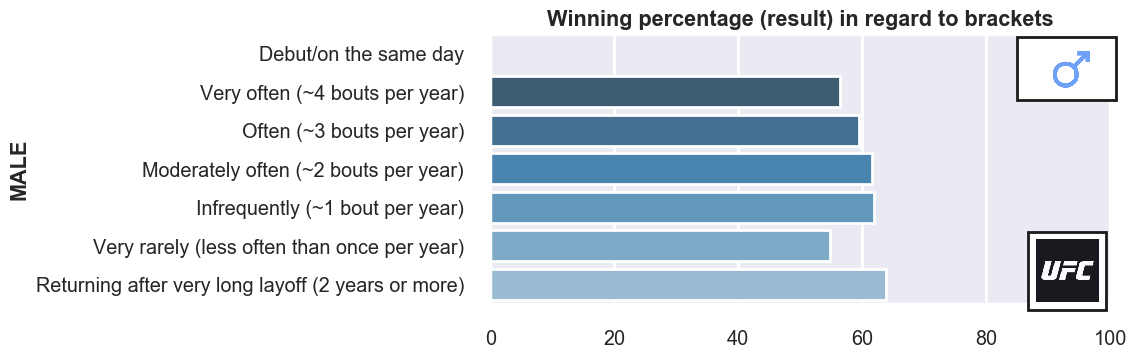

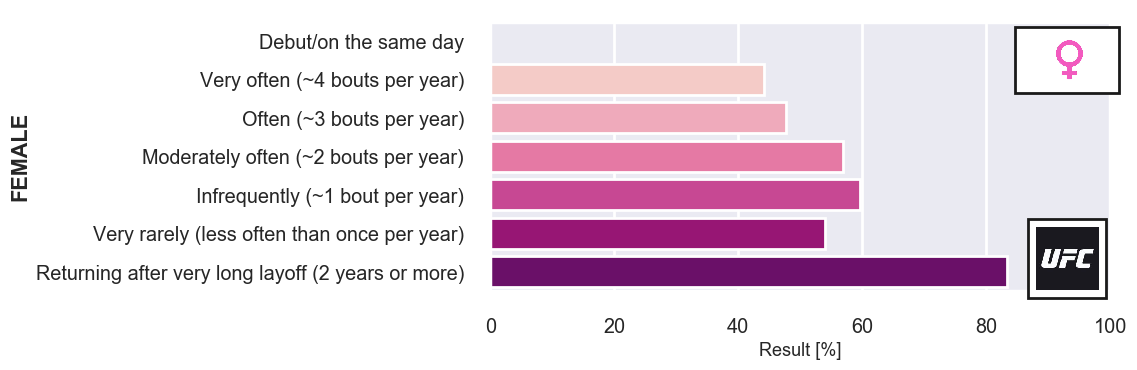

In [124]:
# Comparing charts for all fights recorded inside UFC (UFC roster), broken down by gender.
sns.set(style='darkgrid')
sns.set_context('poster', font_scale = 0.65)

plt.figure(figsize=(8,3.5), dpi= 100)

ax1 = sns.barplot(male_true_pct.values, male_true_pct.index, palette="Blues_d")
ax1.set_xlim(0, 100)
ax1.set_ylabel('MALE', fontweight='heavy')

male_logo = mpimg.imread('male.png')
female_logo = mpimg.imread('female.jpg')

imagebox = OffsetImage(ufc_logo, zoom=0.25)
malebox = OffsetImage(male_logo, zoom=0.2)
ab = AnnotationBbox(imagebox, (93, 5.65))
ab_gen = AnnotationBbox(malebox, (93, 0.4))
ax1.add_artist(ab)
ax1.add_artist(ab_gen)

plt.figure(figsize=(8,3.5), dpi= 100)
ax2 = sns.barplot(female_true_pct, female_true_pct.index, palette="RdPu")
ax2.set_xlim(0, 100)
ax2.set_xlabel('Result [%]', fontsize='smaller')
ax2.set_ylabel('FEMALE', fontweight='heavy')

imagebox = OffsetImage(ufc_logo, zoom=0.25)
femalebox = OffsetImage(female_logo, zoom=0.075)
ab2 = AnnotationBbox(imagebox, (93, 5.65))
ab_gen2 = AnnotationBbox(femalebox, (93, 0.5))
ax2.add_artist(ab2)
ax2.add_artist(ab_gen2)

ax1.set_title('Winning percentage (result) in regard to brackets', fontweight='bold')
plt.show()

Analysing UFC data broken down by gender, enable us to get more insight. I am wondering, if looking at the data in regard to weight division can provide even more useful information. Should fighter's size determine how often is he able to fight without any negative impact on the result?

Proceeding further, we will set aside two edge brackets - ***'Debut/on the same day'*** and '***Returning after very long layoff (2 years or more)***'. We have already looked into data related to them, while analysing UFC roster and Sherdog's database. The amount of observations for these brackets is becoming smaller and smaller with each constraint.

In next part we will inspect data for each weight division while especially paying attention to intervals representing range between 1 and 3 fights per year.

### HEAVYWEIGHT

In [125]:
# Assigning heavyweight division object to variable.
HW_div = weightclass_obj_list[0]

In [126]:
# Validation.
HW_div.name

'Heavyweight'

In [127]:
HW_div.all_fights_counts

Moderately often (~2 bouts per year)                  107
Infrequently (~1 bout per year)                       100
Often (~3 bouts per year)                              68
Very often (~4 bouts per year)                         35
Very rarely (less often than once per year)            26
Returning after very long layoff (2 years or more)      5
Debut/on the same day                                   0
Name: Descriptive_interval, dtype: int64

In [128]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
HW_pct = HW_div.win_fights_counts / (HW_div.win_fights_counts + HW_div.loss_fights_counts)

In [129]:
# Sorting results in ascending order.
HW_pct_sorted = HW_pct.sort_values(ascending=False)

In [130]:
# Removing two boundary brackets in compliance with analysis objective.
HW_pct_sorted = HW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [131]:
HW_pct_sorted

Moderately often (~2 bouts per year)           0.641509
Infrequently (~1 bout per year)                0.628866
Often (~3 bouts per year)                      0.590909
Very rarely (less often than once per year)    0.576923
Very often (~4 bouts per year)                 0.575758
Name: Descriptive_interval, dtype: float64

Analysis outcome for heavyweight division inside UFC in regard to brackets is essentially similar to the outcome of all men analysis. Brackets with frequency ranging from 1 to 3 fights per year, scored the highest results. The differences are minor. 

Two boundary brackets scored the lowest results (same as with all men analysis), which are *7 percentage points lower* than top result.

### LIGHT HEAVYWEIGHT

In [132]:
# Assigning light-heavyweight division object to variable.
LHW_div = weightclass_obj_list[1]

In [133]:
# Validation.
LHW_div.name

'Light Heavyweight'

In [134]:
LHW_div.all_fights_counts

Infrequently (~1 bout per year)                       137
Moderately often (~2 bouts per year)                  131
Often (~3 bouts per year)                              60
Very often (~4 bouts per year)                         50
Very rarely (less often than once per year)            26
Returning after very long layoff (2 years or more)      2
Debut/on the same day                                   0
Name: Descriptive_interval, dtype: int64

In [135]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
LHW_pct = LHW_div.win_fights_counts / (LHW_div.win_fights_counts + LHW_div.loss_fights_counts)

In [136]:
# Sorting results in ascending order.
LHW_pct_sorted = LHW_pct.sort_values(ascending=False)

In [137]:
# Removing two boundary brackets in compliance with analysis objective.
LHW_pct_sorted = LHW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [138]:
LHW_pct_sorted

Very often (~4 bouts per year)                 0.640000
Very rarely (less often than once per year)    0.615385
Often (~3 bouts per year)                      0.600000
Moderately often (~2 bouts per year)           0.592308
Infrequently (~1 bout per year)                0.507463
Name: Descriptive_interval, dtype: float64

As it comes to light heavyweight division we can observe inverted relationship - two boundary intervals scored highest results. Brackets corresponding to 2-3 fights per year are not much lower in regard to result, however, what immediately draws attention is statistically significant difference between bracket representing frequency of 1 bout per year and the top category. **The difference reach to almost *14 percentage points***. It is worth noticing, that it can not be explained by a small number of observations, since this category has the highest amount of observations. Even if we limit ourselves to comparison with *'Moderately often (~2 bouts per year)'*, which has almost the same number of observations, we are still getting approximately *9 percentage points* difference.

### MIDDLEWEIGHT

In [139]:
# Assigning middleweight division object to variable.
MW_div = weightclass_obj_list[2]

In [140]:
# Validation.
MW_div.name

'Middleweight'

In [141]:
MW_div.all_fights_counts

Moderately often (~2 bouts per year)                  153
Infrequently (~1 bout per year)                       137
Often (~3 bouts per year)                              77
Very often (~4 bouts per year)                         59
Very rarely (less often than once per year)            34
Returning after very long layoff (2 years or more)      3
Debut/on the same day                                   0
Name: Descriptive_interval, dtype: int64

In [142]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
MW_pct = MW_div.win_fights_counts / (MW_div.win_fights_counts + MW_div.loss_fights_counts)

In [143]:
# Sorting results in ascending order.
MW_pct_sorted = MW_pct.sort_values(ascending=False)

In [144]:
# Removing two boundary brackets in compliance with analysis objective.
MW_pct_sorted = MW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [145]:
MW_pct_sorted

Moderately often (~2 bouts per year)           0.649007
Infrequently (~1 bout per year)                0.634328
Often (~3 bouts per year)                      0.565789
Very rarely (less often than once per year)    0.531250
Very often (~4 bouts per year)                 0.474576
Name: Descriptive_interval, dtype: float64

Middleweight division presents similar results to heavyweight. Two intervals representing frequency of 1 and 2 bouts per year are scoring highest results. The main difference is connected to the category: 3 bouts per year. It has scored approximately *7 percentage points* lower result, than top categories, which is a bit more dispersed than in case of heavyweights.

Boundary brackets are scoring the lowest results. **It is worth noticing, that interval with the highest frequency of ~4 bouts per year scored extremely low result - *47%***. This makes over **17 percentage points difference** between mentioned bracket and the top one.

### WELTERWEIGHT

In [146]:
# Assigning light-heavyweight division object to variable.
WW_div = weightclass_obj_list[3]

In [147]:
# Validation.
WW_div.name

'Welterweight'

In [148]:
WW_div.all_fights_counts

Moderately often (~2 bouts per year)                  300
Infrequently (~1 bout per year)                       279
Often (~3 bouts per year)                             140
Very often (~4 bouts per year)                        130
Very rarely (less often than once per year)            63
Returning after very long layoff (2 years or more)      8
Debut/on the same day                                   1
Name: Descriptive_interval, dtype: int64

In [149]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
WW_pct = WW_div.win_fights_counts / (WW_div.win_fights_counts + WW_div.loss_fights_counts)

In [150]:
# Sorting results in ascending order.
WW_pct_sorted = WW_pct.sort_values(ascending=False)

In [151]:
# Removing two boundary brackets in compliance with analysis objective.
WW_pct_sorted = WW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [152]:
WW_pct_sorted

Infrequently (~1 bout per year)                0.616487
Moderately often (~2 bouts per year)           0.606780
Very often (~4 bouts per year)                 0.606299
Often (~3 bouts per year)                      0.604317
Very rarely (less often than once per year)    0.587302
Name: Descriptive_interval, dtype: float64

Welterweight division is characterized by very low dispersion in results. There is less than 3 percentage points distinction between top (*Infrequently (~1 bout per year)*) and bottom (*Very rarely (less often than once per year)*) bracket. We can conclude that there is correlation between fighting frequency and results in Welterweight division.

### LIGHTWEIGHT

In [153]:
# Assigning lightweight division object to variable.
LW_div = weightclass_obj_list[4]

In [154]:
# Validation.
LW_div.name

'Lightweight'

In [155]:
LW_div.all_fights_counts

Moderately often (~2 bouts per year)                  285
Infrequently (~1 bout per year)                       266
Often (~3 bouts per year)                             148
Very often (~4 bouts per year)                        130
Very rarely (less often than once per year)            48
Returning after very long layoff (2 years or more)     10
Debut/on the same day                                   0
Name: Descriptive_interval, dtype: int64

In [156]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
LW_pct = LW_div.win_fights_counts / (LW_div.win_fights_counts + LW_div.loss_fights_counts)

In [157]:
# Sorting results in ascending order.
LW_pct_sorted = LW_pct.sort_values(ascending=False)

In [158]:
# Removing two boundary brackets in compliance with analysis objective.
LW_pct_sorted = LW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [159]:
LW_pct_sorted

Very rarely (less often than once per year)    0.659574
Infrequently (~1 bout per year)                0.647287
Moderately often (~2 bouts per year)           0.607774
Often (~3 bouts per year)                      0.584507
Very often (~4 bouts per year)                 0.561538
Name: Descriptive_interval, dtype: float64

**There seems to be very interesting correlation for lightweight division - the lower the frequency, the higher the result.**
First top two categories are quite close to each other in regard to result, then, every next bracket is at least *5 percentage* points below top intervals. There is close to *10 percentage points* difference between fighters, that fought less often than once per year and these, who did not wait longer than 90 days.

### FEATHERWEIGHT

In [160]:
# Assigning featherweight division object to variable.
FW_div = weightclass_obj_list[5]

In [161]:
# Validation.
FW_div.name

'Featherweight'

In [162]:
FW_div.all_fights_counts

Moderately often (~2 bouts per year)                  174
Infrequently (~1 bout per year)                       156
Often (~3 bouts per year)                              62
Very often (~4 bouts per year)                         57
Very rarely (less often than once per year)            50
Returning after very long layoff (2 years or more)      6
Debut/on the same day                                   0
Name: Descriptive_interval, dtype: int64

In [163]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
FW_pct = FW_div.win_fights_counts / (FW_div.win_fights_counts + FW_div.loss_fights_counts)

In [164]:
# Sorting results in ascending order.
FW_pct_sorted = LW_pct.sort_values(ascending=False)

In [165]:
# Removing two boundary brackets in compliance with analysis objective.
FW_pct_sorted = FW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [166]:
FW_pct_sorted

Very rarely (less often than once per year)    0.659574
Infrequently (~1 bout per year)                0.647287
Moderately often (~2 bouts per year)           0.607774
Often (~3 bouts per year)                      0.584507
Very often (~4 bouts per year)                 0.561538
Name: Descriptive_interval, dtype: float64

Featherweight analysis confirms dependencies observed in lightweight division. The lower the frequency, the higher the result.
Once again, the lowest score belongs to time interval that is describing highest frequency. **The gap is almost *10 percentage points*.**

### BANTAMWEIGHT

In [167]:
# Assigning bantamweight division object to variable.
BW_div = weightclass_obj_list[6]

In [168]:
# Validation.
BW_div.name

'Bantamweight'

In [169]:
BW_div.all_fights_counts

Infrequently (~1 bout per year)                       157
Moderately often (~2 bouts per year)                  147
Often (~3 bouts per year)                              68
Very often (~4 bouts per year)                         59
Very rarely (less often than once per year)            34
Returning after very long layoff (2 years or more)      5
Debut/on the same day                                   0
Name: Descriptive_interval, dtype: int64

In [170]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
BW_pct = BW_div.win_fights_counts / (BW_div.win_fights_counts + BW_div.loss_fights_counts)

In [171]:
# Sorting results in ascending order.
BW_pct_sorted = BW_pct.sort_values(ascending=False)

In [172]:
# Removing two boundary brackets in compliance with analysis objective.
BW_pct_sorted = BW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [173]:
BW_pct_sorted

Often (~3 bouts per year)                      0.632353
Moderately often (~2 bouts per year)           0.631944
Infrequently (~1 bout per year)                0.606452
Very often (~4 bouts per year)                 0.593220
Very rarely (less often than once per year)    0.333333
Name: Descriptive_interval, dtype: float64

Highest result was scored by interval labeled as *Often (~3 bouts per year)*. Brackets describing frequency of 1 and 4 bouts per year were also close in the top. **Bracket representing very low-frequency scored the lowest result including all inspected weight categories so far (*33%* of 34 observations).**

### FLYWEIGHT

In [174]:
# Assigning flyweight division object to variable.
FLW_div = weightclass_obj_list[7]

In [175]:
# Validation.
FLW_div.name

'Flyweight'

In [176]:
FLW_div.all_fights_counts

Infrequently (~1 bout per year)                       75
Moderately often (~2 bouts per year)                  68
Often (~3 bouts per year)                             29
Very often (~4 bouts per year)                        22
Very rarely (less often than once per year)           10
Returning after very long layoff (2 years or more)     0
Debut/on the same day                                  0
Name: Descriptive_interval, dtype: int64

In [177]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
FLW_pct = FLW_div.win_fights_counts / (FLW_div.win_fights_counts + FLW_div.loss_fights_counts)

In [178]:
# Sorting results in ascending order.
FLW_pct_sorted = FLW_pct.sort_values(ascending=False)

In [179]:
# Removing two boundary brackets in compliance with analysis objective.
FLW_pct_sorted = FLW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [180]:
FLW_pct_sorted

Infrequently (~1 bout per year)                0.680000
Moderately often (~2 bouts per year)           0.558824
Very often (~4 bouts per year)                 0.500000
Very rarely (less often than once per year)    0.444444
Often (~3 bouts per year)                      0.428571
Name: Descriptive_interval, dtype: float64

Flyweight division can be distinguished as a group with the lowest number of observations. We can notice that data is way more dispersed and there are relatively big inequalities in results. Brackets labeled as *Infrequently (~1 bout per year)* and *Moderately often (~2 bouts per year)* had the highest outcome.

### Visualizations of all men's weight classes.

In [181]:
# Removing two boundary brackets in compliance with analysis objective.
male_pct_trunc = male_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [182]:
male_pct_trunc

Infrequently (~1 bout per year)                0.619455
Moderately often (~2 bouts per year)           0.616012
Often (~3 bouts per year)                      0.594679
Very often (~4 bouts per year)                 0.564246
Very rarely (less often than once per year)    0.547368
Name: Descriptive_interval, dtype: float64

In [183]:
# Creating data frame objects for each division.
HW_frame = pd.DataFrame(dict(HEAVYWEIGHT = HW_pct_sorted, MALE = male_pct_trunc))
LHW_frame = pd.DataFrame(dict(LIGHT_HEAVYWEIGHT = LHW_pct_sorted, MALE = male_pct_trunc))
MW_frame = pd.DataFrame(dict(MIDDLEWEIGHT = MW_pct_sorted, MALE = male_pct_trunc))
WW_frame = pd.DataFrame(dict(WELTERWEIGHT = WW_pct_sorted, MALE = male_pct_trunc))
LW_frame = pd.DataFrame(dict(LIGHTWEIGHT = LW_pct_sorted, MALE = male_pct_trunc))
FW_frame = pd.DataFrame(dict(FEATHERWEIGHT = FW_pct_sorted, MALE = male_pct_trunc))
BW_frame = pd.DataFrame(dict(BANTAMWEIGHT = BW_pct_sorted, MALE = male_pct_trunc))
FLW_frame = pd.DataFrame(dict(FLYWEIGHT = FLW_pct_sorted, MALE = male_pct_trunc))

In [184]:
# Reindexing data frames in order to get clearer visualization.
new_index = ['Very often (~4 bouts per year)', 'Often (~3 bouts per year)', 
             'Moderately often (~2 bouts per year)', 'Infrequently (~1 bout per year)',
             'Very rarely (less often than once per year)']

HW_frame = HW_frame.reindex(index=new_index)
LHW_frame = LHW_frame.reindex(index=new_index)
MW_frame = MW_frame.reindex(index=new_index)
WW_frame = WW_frame.reindex(index=new_index)
LW_frame = LW_frame.reindex(index=new_index)
FW_frame = FW_frame.reindex(index=new_index)
BW_frame = BW_frame.reindex(index=new_index)
FLW_frame = FLW_frame.reindex(index=new_index)

In [185]:
# Helper function that initiates plots that compare weight class results to gender results.
def create_div_barplot(div_frame, gender):
    '''
    args: DataFrame obj, 
          gender as string: F for female, or M for men
    '''
    plt.rcdefaults()
    if gender == 'M':
        with plt.style.context('seaborn'):
            plt.figure(figsize=(18, 9), dpi=100)
            ax = div_frame.plot(kind='bar', fontsize=13, ylim=(0, 1), color=['k', 'b'])

            imagebox = OffsetImage(ufc_logo, zoom=0.25)
            malebox = OffsetImage(male_logo, zoom=0.2)
            ab = AnnotationBbox(imagebox, (0, 0.91))
            ab_gen = AnnotationBbox(malebox, (0.75, 0.92))
            ax.add_artist(ab)
            ax.add_artist(ab_gen)

            plt.title('Winning fraction (result) in regard to brackets', fontweight='bold')
            plt.legend(frameon=True, shadow=True)
            plt.show()
    elif gender == 'F':
        with plt.style.context('seaborn'):
            plt.figure(figsize=(18, 9), dpi=100)
            ax = div_frame.plot(kind='bar', fontsize=13, ylim=(0, 1), color=['k', 'fuchsia'])

            imagebox = OffsetImage(ufc_logo, zoom=0.25)
            femalebox = OffsetImage(female_logo, zoom=0.071)
            ab = AnnotationBbox(imagebox, (0, 0.91))
            ab_gen = AnnotationBbox(femalebox, (0.75, 0.92))
            ax.add_artist(ab)
            ax.add_artist(ab_gen)

            plt.title('Winning fraction (result) in regard to brackets', fontweight='bold')
            plt.legend(frameon=True, shadow=True)
            plt.show()
    else:
        print('Gender was not specyfied in the function!')

<Figure size 1800x900 with 0 Axes>

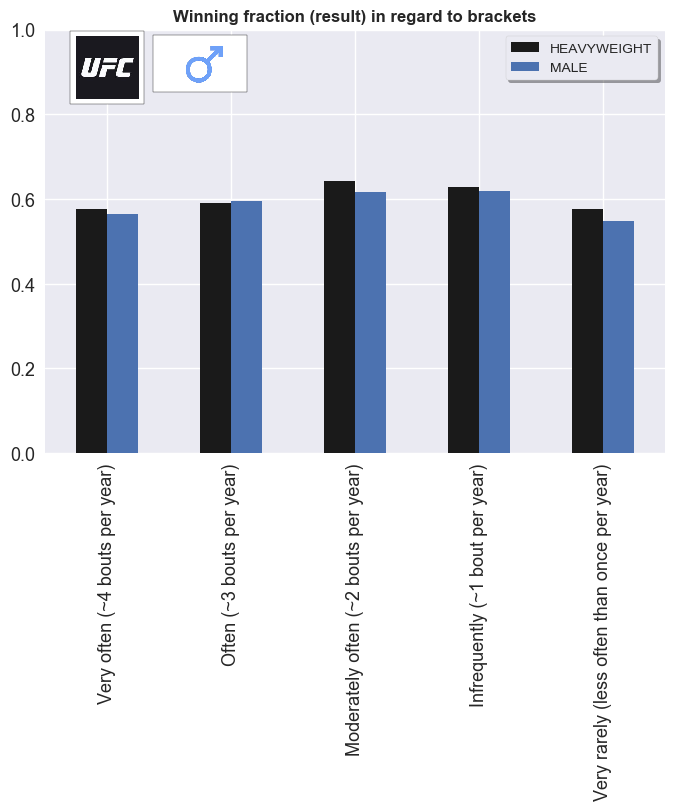

In [186]:
# Plot that compares heavyweight division with UFC's male population in regard to result.
create_div_barplot(HW_frame, 'M')

<Figure size 1800x900 with 0 Axes>

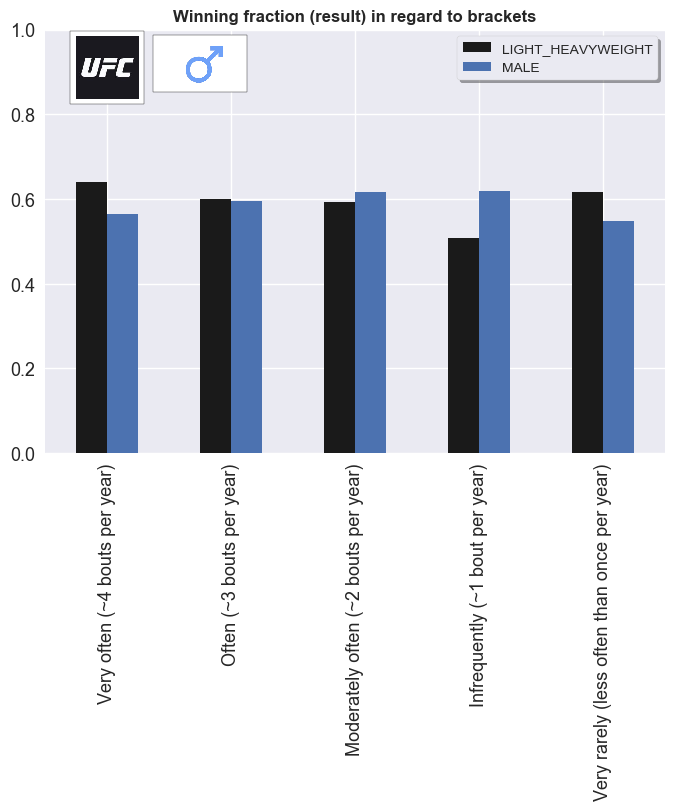

In [187]:
# Plot that compares light-heavyweight division with UFC's male population in regard to result.
create_div_barplot(LHW_frame, 'M')

<Figure size 1800x900 with 0 Axes>

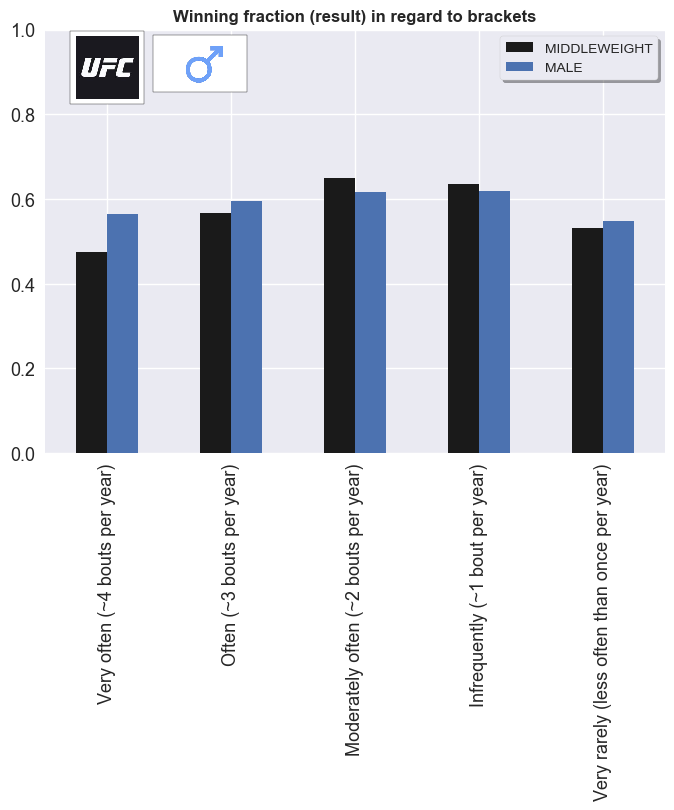

In [188]:
# Plot that compares middleweight division with UFC's male population in regard to result.
create_div_barplot(MW_frame, 'M')

<Figure size 1800x900 with 0 Axes>

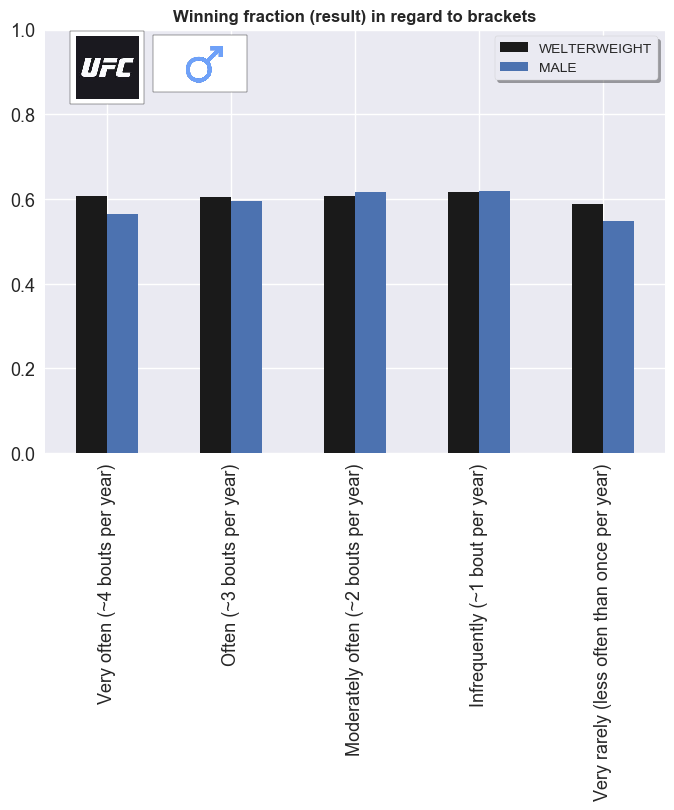

In [189]:
# Plot that compares welterweight division with UFC's male population in regard to result.
create_div_barplot(WW_frame, 'M')

<Figure size 1800x900 with 0 Axes>

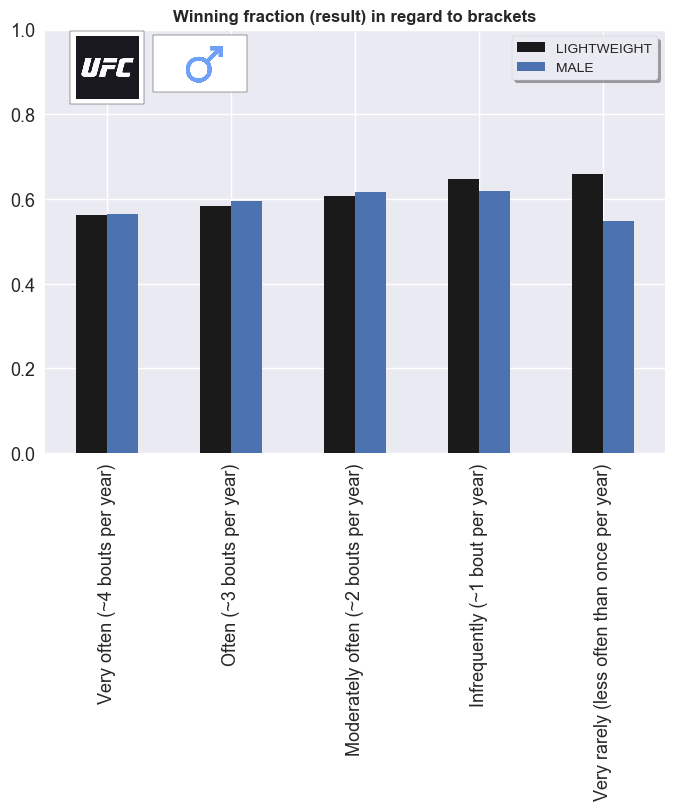

In [190]:
# Plot that compares lightweight division with UFC's male population in regard to result.
create_div_barplot(LW_frame, 'M')

<Figure size 1800x900 with 0 Axes>

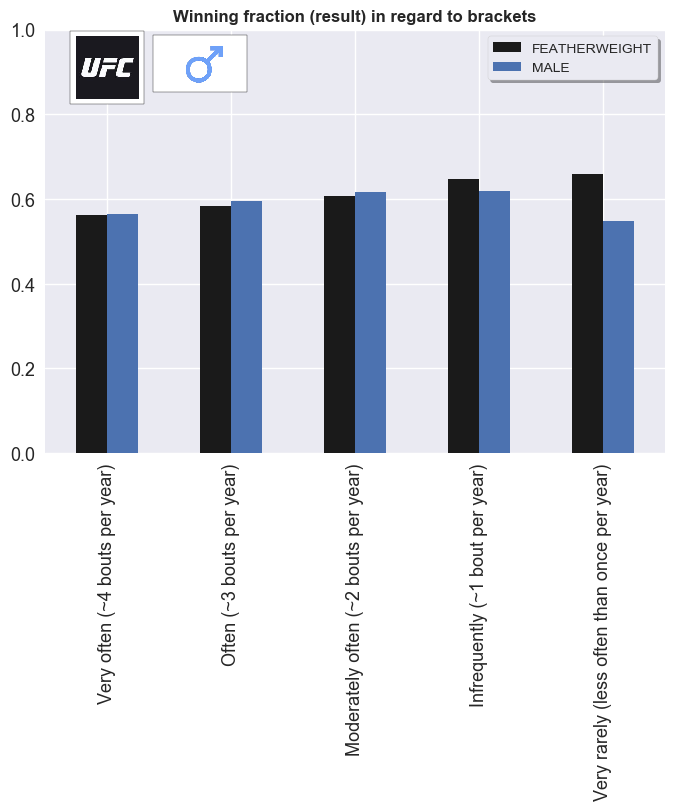

In [191]:
# Plot that compares featherweight division with UFC's male population in regard to result.
create_div_barplot(FW_frame, 'M')

<Figure size 1800x900 with 0 Axes>

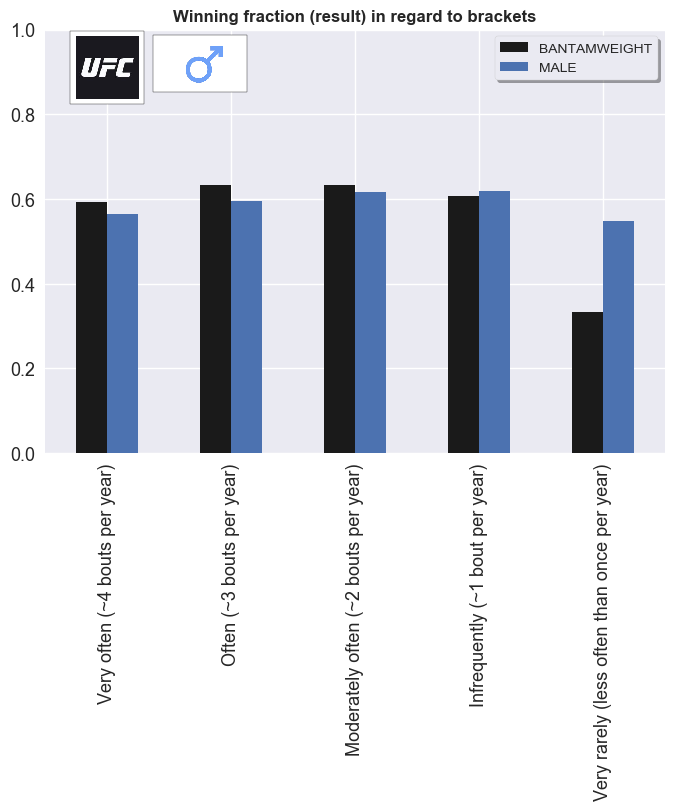

In [192]:
# Plot that compares bantamweight division with UFC's male population in regard to result.
create_div_barplot(BW_frame, 'M')

<Figure size 1800x900 with 0 Axes>

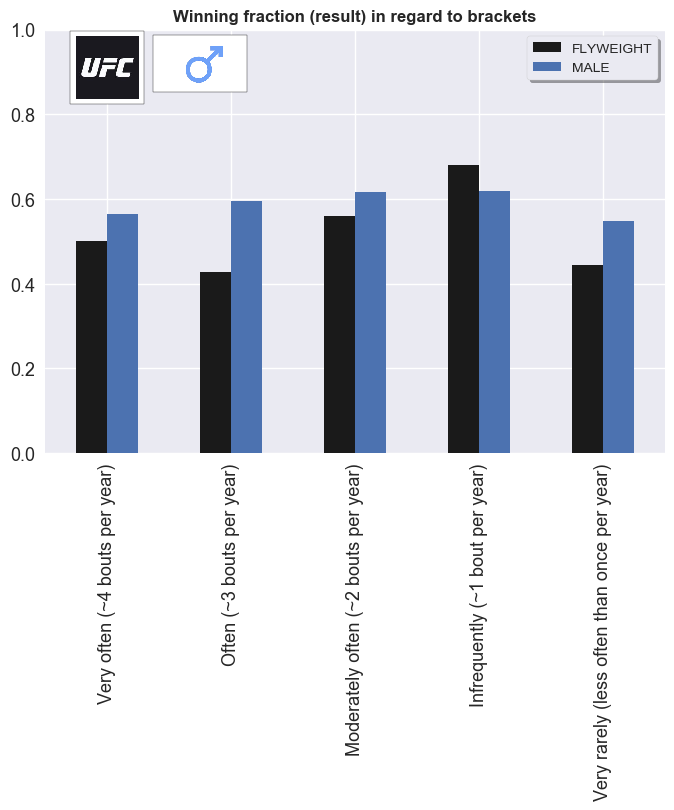

In [193]:
# Plot that compares flyweight division with UFC's male population in regard to result.
create_div_barplot(FLW_frame, 'M')

### WOMEN'S STRAWWEIGHT

In [194]:
# Assigning women's stawweight division object to variable.
WSW_div = weightclass_obj_list[8]

In [195]:
# Validation.
WSW_div.name

"Women's Strawweight"

In [196]:
WSW_div.all_fights_counts

Moderately often (~2 bouts per year)                  75
Infrequently (~1 bout per year)                       69
Often (~3 bouts per year)                             36
Very rarely (less often than once per year)           23
Very often (~4 bouts per year)                        20
Returning after very long layoff (2 years or more)     3
Debut/on the same day                                  0
Name: Descriptive_interval, dtype: int64

In [197]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
WSW_pct = WSW_div.win_fights_counts / (WSW_div.win_fights_counts + WSW_div.loss_fights_counts)

In [198]:
# Sorting results in ascending order.
WSW_pct_sorted = WSW_pct.sort_values(ascending=False)

In [199]:
# Removing two boundary brackets in compliance with analysis objective.
WSW_pct_sorted = WSW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [200]:
WSW_pct_sorted

Very rarely (less often than once per year)    0.652174
Moderately often (~2 bouts per year)           0.560000
Very often (~4 bouts per year)                 0.555556
Infrequently (~1 bout per year)                0.536232
Often (~3 bouts per year)                      0.500000
Name: Descriptive_interval, dtype: float64

Bracket representing very low-frequency scored highest result by far (*almost 10 percentage points* above second highest category). Further inequalities were not that significant and span between second highest bracket and one with the lowest result was only *6 percentage points*.

### WOMEN'S FLYWEIGHT

In [201]:
# Assigning women's stawweight division object to variable.
WFLW_div = weightclass_obj_list[9]

In [202]:
# Validation.
WFLW_div.name

"Women's Flyweight"

In [203]:
WFLW_div.all_fights_counts

Infrequently (~1 bout per year)                       64
Moderately often (~2 bouts per year)                  56
Often (~3 bouts per year)                             22
Very rarely (less often than once per year)           19
Very often (~4 bouts per year)                        12
Returning after very long layoff (2 years or more)     1
Debut/on the same day                                  0
Name: Descriptive_interval, dtype: int64

In [204]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
WFLW_pct = WFLW_div.win_fights_counts / (WFLW_div.win_fights_counts + WFLW_div.loss_fights_counts)

In [205]:
# Sorting results in ascending order.
WFLW_pct_sorted = WFLW_pct.sort_values(ascending=False)

In [206]:
# Removing two boundary brackets in compliance with analysis objective.
WFLW_pct_sorted = WFLW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [207]:
WFLW_pct_sorted

Infrequently (~1 bout per year)                0.625000
Very rarely (less often than once per year)    0.526316
Moderately often (~2 bouts per year)           0.509091
Often (~3 bouts per year)                      0.454545
Very often (~4 bouts per year)                 0.250000
Name: Descriptive_interval, dtype: float64

In women's flyweight division, bracket associated with frequency of 1 bout per year scored the highest result (approximately *10 percentage points* higher than second highest category). Two intervals representing highest frequency scored lowest results.
That coincide with results of women's population in UFC.

### WOMEN'S BANTAMWEIGHT

In [208]:
# Assigning women's stawweight division object to variable.
WBW_div = weightclass_obj_list[10]

In [209]:
# Validation.
WBW_div.name

"Women's Bantamweight"

In [210]:
WBW_div.all_fights_counts

Infrequently (~1 bout per year)                       56
Moderately often (~2 bouts per year)                  38
Very rarely (less often than once per year)           15
Very often (~4 bouts per year)                        11
Often (~3 bouts per year)                              9
Returning after very long layoff (2 years or more)     2
Debut/on the same day                                  0
Name: Descriptive_interval, dtype: int64

In [211]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
WBW_pct = WBW_div.win_fights_counts / (WBW_div.win_fights_counts + WBW_div.loss_fights_counts)

In [212]:
# Sorting results in ascending order.
WBW_pct_sorted = WBW_pct.sort_values(ascending=False)

In [213]:
# Removing two boundary brackets in compliance with analysis objective.
WBW_pct_sorted = WBW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [214]:
WBW_pct_sorted

Moderately often (~2 bouts per year)           0.675676
Infrequently (~1 bout per year)                0.625000
Very rarely (less often than once per year)    0.466667
Very often (~4 bouts per year)                 0.454545
Often (~3 bouts per year)                      0.375000
Name: Descriptive_interval, dtype: float64

Women's bantamweight results are quite similar to what was observed during women's flyweight analysis. Two highest results are obtained by low-frequency intervals: *Moderately often (~2 bouts per year)* and *Infrequently (~1 bout per year)*, although bracket representing lower fight activity than once per year, scored significantly worse result than top two brackets. Besides that, the lowest results were again connected to higher fighting frequency.

### WOMEN'S FEATHERWEIGHT

In [215]:
# Assigning women's stawweight division object to variable.
WFW_div = weightclass_obj_list[11]

In [216]:
# Validation.
WFW_div.name

"Women's Featherweight"

In [217]:
WFW_div.all_fights_counts

Infrequently (~1 bout per year)                       7
Moderately often (~2 bouts per year)                  7
Very rarely (less often than once per year)           6
Very often (~4 bouts per year)                        2
Often (~3 bouts per year)                             1
Returning after very long layoff (2 years or more)    0
Debut/on the same day                                 0
Name: Descriptive_interval, dtype: int64

In [218]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
WFW_pct = WFW_div.win_fights_counts / (WFW_div.win_fights_counts + WFW_div.loss_fights_counts)

In [219]:
# Sorting results in ascending order.
WFW_pct_sorted = WFW_pct.sort_values(ascending=False)

In [220]:
# Removing two boundary brackets in compliance with analysis objective.
WFW_pct_sorted = WFW_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [221]:
WFW_pct_sorted

Often (~3 bouts per year)                      1.000000
Infrequently (~1 bout per year)                0.714286
Moderately often (~2 bouts per year)           0.571429
Very often (~4 bouts per year)                 0.500000
Very rarely (less often than once per year)    0.333333
Name: Descriptive_interval, dtype: float64

Unfortunately, there is fluctuation in data due to the very small amount of observations in women's featherweight.

### Visualizations of all women's weight classes.

In [222]:
# Removing two boundary brackets in compliance with analysis objective.
female_pct_trunc = female_pct_sorted.drop(labels=['Debut/on the same day', 
                                           'Returning after very long layoff (2 years or more)'])

In [223]:
female_pct_trunc

Infrequently (~1 bout per year)                0.596939
Moderately often (~2 bouts per year)           0.568966
Very rarely (less often than once per year)    0.539683
Often (~3 bouts per year)                      0.477612
Very often (~4 bouts per year)                 0.441860
Name: Descriptive_interval, dtype: float64

In [224]:
# Creating data frame objects for each division.
WSW_frame = pd.DataFrame(dict(STRAWWEIGHT = WSW_pct_sorted, FEMALE = female_pct_trunc))
WFLW_frame = pd.DataFrame(dict(FLYWEIGHT = WFLW_pct_sorted, FEMALE = female_pct_trunc))
WBW_frame = pd.DataFrame(dict(BANTAMWEIGHT = WBW_pct_sorted, FEMALE = female_pct_trunc))
WFW_frame = pd.DataFrame(dict(FEATHERWEIGHT = WFW_pct_sorted, FEMALE = female_pct_trunc))

In [225]:
# Reindexing data frames in order to get clearer visualization.
new_index = ['Very often (~4 bouts per year)', 'Often (~3 bouts per year)', 
             'Moderately often (~2 bouts per year)', 'Infrequently (~1 bout per year)',
             'Very rarely (less often than once per year)']

WSW_frame = WSW_frame.reindex(index=new_index)
WFLW_frame = WFLW_frame.reindex(index=new_index)
WBW_frame = WBW_frame.reindex(index=new_index)
WFW_frame = WFW_frame.reindex(index=new_index)

<Figure size 1800x900 with 0 Axes>

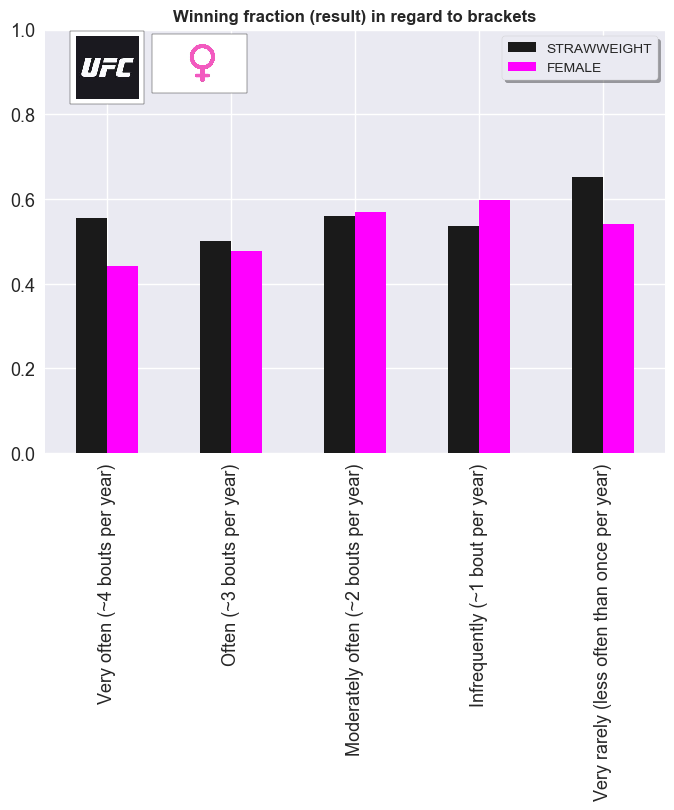

In [226]:
# Plot that compares strawweight division with UFC's female population in regard to result.
create_div_barplot(WSW_frame, 'F')

<Figure size 1800x900 with 0 Axes>

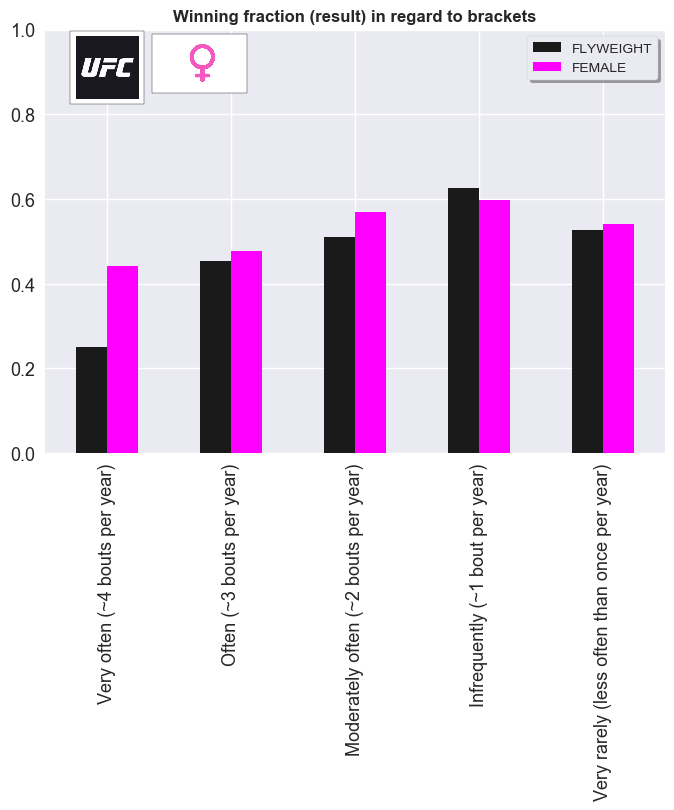

In [227]:
# Plot that compares flyweight division with UFC's female population in regard to result.
create_div_barplot(WFLW_frame, 'F')

<Figure size 1800x900 with 0 Axes>

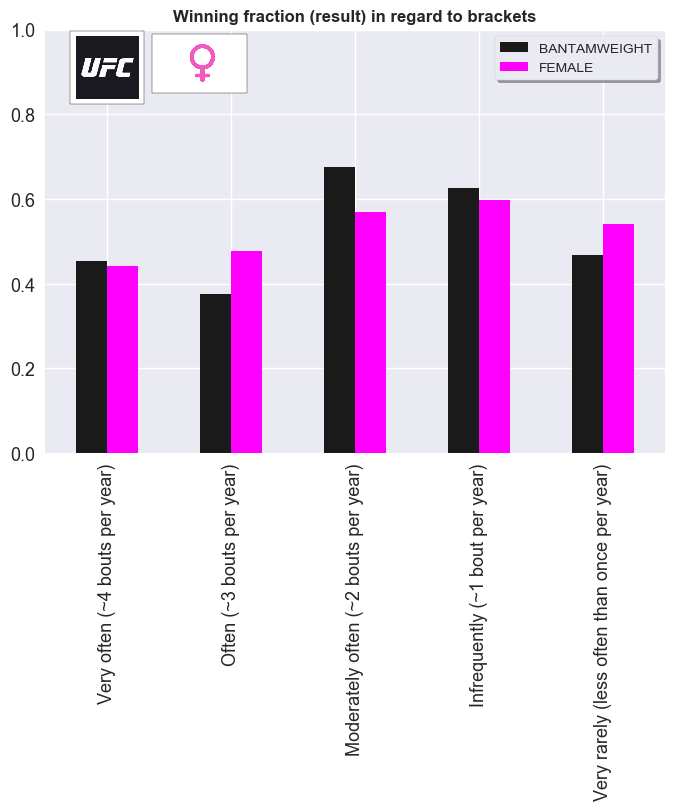

In [228]:
# Plot that compares bantamweight division with UFC's female population in regard to result.
create_div_barplot(WBW_frame, 'F')

<Figure size 1800x900 with 0 Axes>

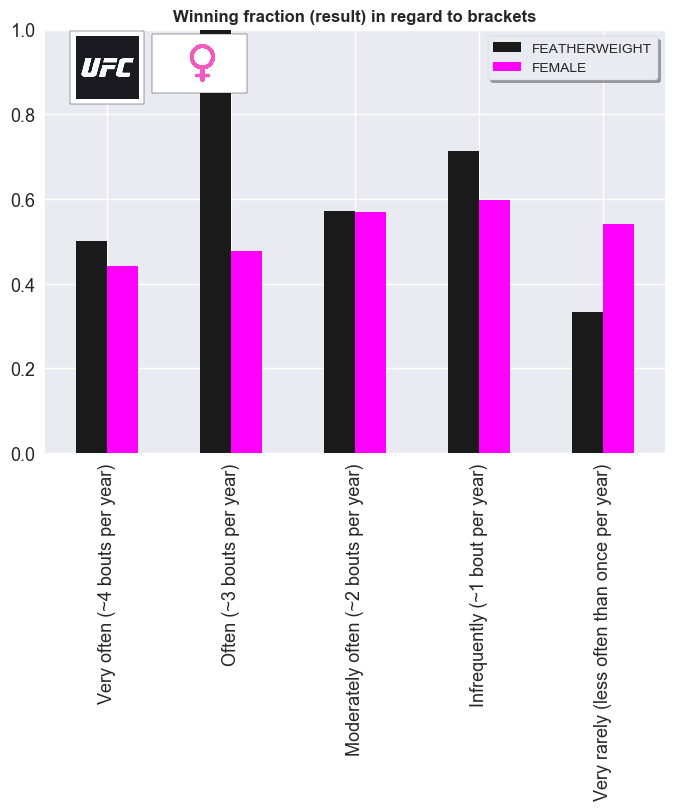

In [229]:
# Plot that compares feathwerweight division with UFC's female population in regard to result.
create_div_barplot(WFW_frame, 'F')

## Segment 5: *Further analysis - taking special circumstances into account*

In first part we will try to verify hypothesis: there is correlation between length of time off taken by MMA fighter after KO/TKO loss and his chances in winning next bout.

We will check for hypothesis validation, using UFC roster data first.

In [230]:
ufc_selected_data[0:10]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval
0,Shamil Abdurakhimov,loss,UFC 242 - Khabib vs. Poirier,2019-09-07,140,Moderately often (~2 bouts per year)
1,Shamil Abdurakhimov,win,UFC Fight Night 149 - Overeem vs. Oleynik,2019-04-20,217,Infrequently (~1 bout per year)
2,Shamil Abdurakhimov,win,UFC Fight Night 136 - Hunt vs. Oleynik,2018-09-15,294,Infrequently (~1 bout per year)
3,Shamil Abdurakhimov,win,UFC Fight Night 122 - Bisping vs. Gastelum,2017-11-25,351,Infrequently (~1 bout per year)
4,Shamil Abdurakhimov,loss,UFC Fight Night 102 - Lewis vs. Abdurakhimov,2016-12-09,69,Very often (~4 bouts per year)
5,Shamil Abdurakhimov,win,UFC Fight Night 96 - Lineker vs. Dodson,2016-10-01,223,Infrequently (~1 bout per year)
6,Shamil Abdurakhimov,win,UFC Fight Night 83 - Cerrone vs. Oliveira,2016-02-21,323,Infrequently (~1 bout per year)
7,Shamil Abdurakhimov,loss,UFC Fight Night 63 - Mendes vs. Lamas,2015-04-04,301,Infrequently (~1 bout per year)
8,Shamil Abdurakhimov,win,M-1 Challenge 49 - Battle in the Mountains,2014-06-07,246,Infrequently (~1 bout per year)
9,Shamil Abdurakhimov,win,Tech-Krep FC - Southern Front 2,2013-10-04,551,Very rarely (less often than once per year)


In [231]:
ufc_data[0:10]

,Fighter,Opponent,Result,Event,Event_date,Method,Referee,Round,Time
0,Shamil Abdurakhimov,Curtis Blaydes,loss,UFC 242 - Khabib vs. Poirier,Sep / 07 / 2019,TKO (Elbow and Punch),Marc Goddard,2,02:22
1,Shamil Abdurakhimov,Marcin Tybura,win,UFC Fight Night 149 - Overeem vs. Oleynik,Apr / 20 / 2019,TKO (Punches),Herb Dean,2,03:15
2,Shamil Abdurakhimov,Andrei Arlovski,win,UFC Fight Night 136 - Hunt vs. Oleynik,Sep / 15 / 2018,Decision (Unanimous),Leon Roberts,3,05:00
3,Shamil Abdurakhimov,Chase Sherman,win,UFC Fight Night 122 - Bisping vs. Gastelum,Nov / 25 / 2017,KO (Punches),Steve Perceval,1,01:24
4,Shamil Abdurakhimov,Derrick Lewis,loss,UFC Fight Night 102 - Lewis vs. Abdurakhimov,Dec / 09 / 2016,TKO (Punches),Dan Miragliotta,4,03:42
5,Shamil Abdurakhimov,Walt Harris,win,UFC Fight Night 96 - Lineker vs. Dodson,Oct / 01 / 2016,Decision (Split),Herb Dean,3,05:00
6,Shamil Abdurakhimov,Anthony Hamilton,win,UFC Fight Night 83 - Cerrone vs. Oliveira,Feb / 21 / 2016,Decision (Unanimous),Chip Snider,3,05:00
7,Shamil Abdurakhimov,Timothy Johnson,loss,UFC Fight Night 63 - Mendes vs. Lamas,Apr / 04 / 2015,TKO (Punches),Mike King,1,04:57
8,Shamil Abdurakhimov,Kenny Garner,win,M-1 Challenge 49 - Battle in the Mountains,Jun / 07 / 2014,Decision (Unanimous),Viktor Korneev,3,05:00
9,Shamil Abdurakhimov,Neil Grove,win,Tech-Krep FC - Southern Front 2,Oct / 04 / 2013,Decision (Unanimous),Ashot Ashughyan,3,05:00


In [232]:
# Creating new variable where we store UFC's roster data frame.
ufc_extra_data = ufc_selected_data.copy()

In [233]:
# Adding two necessary, new columns.
ufc_extra_data['Method'] = ufc_data['Method']
ufc_extra_data['Round'] = ufc_data['Round']

In [234]:
ufc_extra_data[0:10]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval,Method,Round
0,Shamil Abdurakhimov,loss,UFC 242 - Khabib vs. Poirier,2019-09-07,140,Moderately often (~2 bouts per year),TKO (Elbow and Punch),2
1,Shamil Abdurakhimov,win,UFC Fight Night 149 - Overeem vs. Oleynik,2019-04-20,217,Infrequently (~1 bout per year),TKO (Punches),2
2,Shamil Abdurakhimov,win,UFC Fight Night 136 - Hunt vs. Oleynik,2018-09-15,294,Infrequently (~1 bout per year),Decision (Unanimous),3
3,Shamil Abdurakhimov,win,UFC Fight Night 122 - Bisping vs. Gastelum,2017-11-25,351,Infrequently (~1 bout per year),KO (Punches),1
4,Shamil Abdurakhimov,loss,UFC Fight Night 102 - Lewis vs. Abdurakhimov,2016-12-09,69,Very often (~4 bouts per year),TKO (Punches),4
5,Shamil Abdurakhimov,win,UFC Fight Night 96 - Lineker vs. Dodson,2016-10-01,223,Infrequently (~1 bout per year),Decision (Split),3
6,Shamil Abdurakhimov,win,UFC Fight Night 83 - Cerrone vs. Oliveira,2016-02-21,323,Infrequently (~1 bout per year),Decision (Unanimous),3
7,Shamil Abdurakhimov,loss,UFC Fight Night 63 - Mendes vs. Lamas,2015-04-04,301,Infrequently (~1 bout per year),TKO (Punches),1
8,Shamil Abdurakhimov,win,M-1 Challenge 49 - Battle in the Mountains,2014-06-07,246,Infrequently (~1 bout per year),Decision (Unanimous),3
9,Shamil Abdurakhimov,win,Tech-Krep FC - Southern Front 2,2013-10-04,551,Very rarely (less often than once per year),Decision (Unanimous),3


In [245]:
# Applying mask in order to filter through records that are meeting new analysis constraints. Assigning outcome to variable.
ufc_after_ko = ufc_extra_data[(ufc_extra_data['Result'].shift(-1) == 'loss') & 
                              (ufc_extra_data['Method'].shift(-1).str.contains('KO')) & 
                              (ufc_extra_data['Fighter'] == ufc_extra_data['Fighter'].shift(-1))].copy()

In [246]:
ufc_after_ko[0:10]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval,Method,Round
3,Shamil Abdurakhimov,win,UFC Fight Night 122 - Bisping vs. Gastelum,2017-11-25,351,Infrequently (~1 bout per year),KO (Punches),1
6,Shamil Abdurakhimov,win,UFC Fight Night 83 - Cerrone vs. Oliveira,2016-02-21,323,Infrequently (~1 bout per year),Decision (Unanimous),3
33,Klidson Abreu,win,JF - Jungle Fight 90,2016-09-03,105,Often (~3 bouts per year),TKO (Doctor Stoppage),3
36,Klidson Abreu,win,SFC 1 - Sierra Fighting Championship 1,2015-08-22,252,Infrequently (~1 bout per year),TKO (Punches),1
78,Kevin Aguilar,win,LFC 39 - Legacy Fighting Championship 39,2015-02-27,448,Very rarely (less often than once per year),TKO (Punches),3
92,Omari Akhmedov,win,UFC Fight Night 101 - Whittaker vs. Brunson,2016-11-26,224,Infrequently (~1 bout per year),Decision (Unanimous),3
93,Omari Akhmedov,loss,UFC on Fox 19 - Teixeira vs. Evans,2016-04-16,128,Moderately often (~2 bouts per year),TKO (Knees and Punches),3
122,Heili Alateng,win,Road FC 46 - Road Fighting Championship 46,2018-03-10,364,Infrequently (~1 bout per year),TKO (Punches),1
134,Heili Alateng,loss,CKFC - Chinese Kung Fu Championships,2014-12-23,37,Very often (~4 bouts per year),Decision (Unanimous),3
136,Heili Alateng,win,CKFC - Chinese Kung Fu Championships,2014-11-11,157,Moderately often (~2 bouts per year),Submission (Rear-Naked Choke),2


In [237]:
# Assigning 'Descriptive_interval' column to variable.
ufc_ko_brackets = ufc_after_ko['Descriptive_interval']

In [238]:
# Creating variables where interval data is assigned based on type of fight outcome.
ufc_ako_all_fights_count = ufc_ko_brackets.value_counts()
ufc_ako_win_fights_count = ufc_ko_brackets[ufc_after_ko['Result'] == 'win'].value_counts()
ufc_ako_loss_fights_count = ufc_ko_brackets[ufc_after_ko['Result'] == 'loss'].value_counts()
ufc_ako_draw_fights_count = ufc_ko_brackets[ufc_after_ko['Result'] == 'draw'].value_counts()
ufc_ako_nc_fights_count = ufc_ko_brackets[ufc_after_ko['Result'] == 'NC'].value_counts()

In [247]:
ufc_ako_all_fights_count

Infrequently (~1 bout per year)                       268
Moderately often (~2 bouts per year)                  208
Very often (~4 bouts per year)                         84
Often (~3 bouts per year)                              70
Very rarely (less often than once per year)            69
Returning after very long layoff (2 years or more)     16
Debut/on the same day                                   0
Name: Descriptive_interval, dtype: int64

In [248]:
# Checking if there are any missing values in 'Descriptive_interval' column.
ufc_after_ko[ufc_after_ko['Descriptive_interval'].isna()]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval,Method,Round


In [249]:
# Data validation - checking if there is any record that was not qualified as either win, loss, draw or no-contest.
ufc_ako_sum_of_brackets = (ufc_ako_win_fights_count.sum() + ufc_ako_loss_fights_count.sum() + 
ufc_ako_draw_fights_count.sum() + ufc_ako_nc_fights_count.sum())

if ufc_ako_all_fights_count.sum() == ufc_ako_sum_of_brackets:
    print('Verification successful!')

Verification successful!


In [251]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
ufc_ako_pct = ufc_ako_win_fights_count/(ufc_ako_win_fights_count + ufc_ako_loss_fights_count)

In [252]:
# Sorting results in ascending order.
ufc_ako_sorted = ufc_ako_pct.sort_values(ascending=False)

In [253]:
# Removing debut bracket in compliance with analysis objective - obviously, fighting after KO loss is not possible in debut.
ufc_ako_sorted = ufc_ako_sorted.drop(labels=['Debut/on the same day'])

In [254]:
ufc_ako_sorted

Returning after very long layoff (2 years or more)    0.933333
Often (~3 bouts per year)                             0.800000
Very often (~4 bouts per year)                        0.746988
Very rarely (less often than once per year)           0.705882
Infrequently (~1 bout per year)                       0.642586
Moderately often (~2 bouts per year)                  0.640394
Name: Descriptive_interval, dtype: float64

In [255]:
# Removing debut bracket from UFC roster data in order to visualize data together with 'after_ko' data.
ufc_pct_trunc = ufc_pct_sorted.drop(labels=['Debut/on the same day'])

In [256]:
# Creating new data frame,
ufc_ako_frame = pd.DataFrame(dict(AFTER_KO_LOSS = ufc_ako_sorted, UFC_ROSTER = ufc_pct_trunc))

In [257]:
# Reindexing data frames in order to get clearer visualization.
rep_index = ['Very often (~4 bouts per year)', 'Often (~3 bouts per year)', 
             'Moderately often (~2 bouts per year)', 'Infrequently (~1 bout per year)',
             'Very rarely (less often than once per year)', 'Returning after very long layoff (2 years or more)']

ufc_ako_frame = ufc_ako_frame.reindex(index=rep_index)

In [258]:
ufc_ako_frame

,AFTER_KO_LOSS,UFC_ROSTER
Very often (~4 bouts per year),0.746988,0.800858
Often (~3 bouts per year),0.800000,0.742574
Moderately often (~2 bouts per year),0.640394,0.734148
Infrequently (~1 bout per year),0.642586,0.722242
Very rarely (less often than once per year),0.705882,0.703540
Returning after very long layoff (2 years or more),0.933333,0.830357


In [259]:
# Helper function that initiates plots that compare UFC roster results to special circumstances data.
def create_occ_barplot(frame, dataset, colors):
    '''
    args: DataFrame obj,
          dataset as string: ufc or sherdog
          colors as a list of strings (len=2)
    '''
    plt.rcdefaults()
    with plt.style.context('seaborn'):
            
            if dataset == 'ufc':
                plt.figure(figsize=(18, 9), dpi=100)
                ax = frame.plot(kind='bar', fontsize=13, ylim=(0, 1), color=[colors[0], colors[1]])
                imagebox = OffsetImage(ufc_logo, zoom=0.23)
                ab = AnnotationBbox(imagebox, (0, 0.91))
                ax.add_artist(ab)
            elif dataset == 'sherdog':
                plt.figure(figsize=(18, 9), dpi=100)
                ax = frame.plot(kind='bar', fontsize=13, ylim=(0, 1), color=[colors[0], colors[1]])
                imagebox = OffsetImage(sher_logo, zoom=0.3)
                ab = AnnotationBbox(imagebox, (0.15, 0.91))
                ax.add_artist(ab)
            

            plt.title('Winning fraction (result) in regard to brackets', fontweight='bold')
            plt.legend(frameon=True, shadow=True, loc=9)
            plt.show()

<Figure size 1800x900 with 0 Axes>

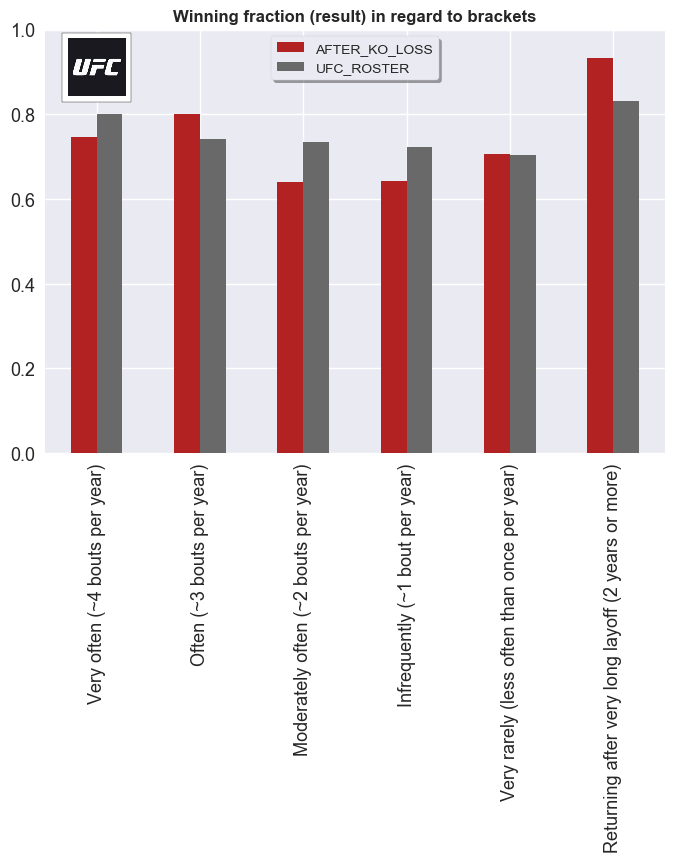

In [260]:
create_occ_barplot(ufc_ako_frame, 'ufc', ['firebrick', 'dimgrey'])

**Analysis have not confirmed hypothesis** - as we can see, with categories: *Very often (~4 bouts per year)*, *Moderately often (~2 bouts per year)* and *Infrequently (~1 bout per year)* the result for fighters which were coming back after KO/TKO loss was indeed lower (reaching almost *10 percentage points* difference), although this was not the case for bracket labeled as *Often (~3 bouts per year)*. There is inverse relationship and fighters, that were actually coming back after KO/TKO loss in range of this particular interval, scored *6 percentage points* higher result than whole UFC roster. Same relationship can be observed with category *Returning after very long layoff (2 years or more)*. The result there was almost *10 percentage points* higher than for UFC roster.

For bracket with interval representing frequency of 1 bout per year, the result outcome matched UFC's roster result.

Some categories were represented by small amount of observations. The next step will include applying same analysis to Sherdog's database.

In [261]:
sherdog_selected_data[0:10]

,Fighter,Result,Event_date,Time_interval,Descriptive_interval
0,Tony Galindo,loss,2005-03-20,758,Returning after very long layoff (2 years or m...
1,Tony Galindo,loss,2003-02-21,530,Very rarely (less often than once per year)
2,Tony Galindo,loss,2001-09-09,78,Very often (~4 bouts per year)
3,Tony Galindo,win,2001-06-23,119,Often (~3 bouts per year)
4,Tony Galindo,draw,2001-02-24,87,Very often (~4 bouts per year)
5,Tony Galindo,win,2000-11-29,158,Moderately often (~2 bouts per year)
6,Tony Galindo,win,2000-06-24,0,Debut/on the same day
7,Kurt Rojo,loss,2000-12-09,168,Moderately often (~2 bouts per year)
8,Kurt Rojo,loss,2000-06-24,0,Debut/on the same day
9,Brian Hawkins,loss,2006-03-18,1121,Returning after very long layoff (2 years or m...


In [262]:
sherdog_data[0:10]

,Fighter,Opponent,Result,Event,Event_date,Method,Referee,Round,Time;
0,Tony Galindo,Tony Lopez,loss,KOTC 49 Soboba,Mar / 20 / 2005,KO (Punches),NaN,1,3:24;
1,Tony Galindo,Joey Villasenor,loss,KOTC 21 Invasion,Feb / 21 / 2003,TKO (Corner Stoppage),Larry Landless,1,5:00;
2,Tony Galindo,Brian Sleeman,loss,GC 6 Caged Beasts,Sep / 09 / 2001,TKO (Corner Stoppage),Larry Landless,2,3:10;
3,Tony Galindo,Reggie Cardiel,win,KOTC 9 Showtime,Jun / 23 / 2001,Decision,NaN,2,5:00;
4,Tony Galindo,Reggie Cardiel,draw,KOTC 7 Wet and Wild,Feb / 24 / 2001,Draw,NaN,2,5:00;
5,Tony Galindo,Brian Hawkins,win,KOTC 6 Road Warriors,Nov / 29 / 2000,TKO (Punches),NaN,1,1:30;
6,Tony Galindo,Kurt Rojo,win,KOTC 4 Gladiators,Jun / 24 / 2000,KO (Punch),NaN,1,0:07;
7,Kurt Rojo,Phillip Miller,loss,GC 1 Gladiator Challenge 1,Dec / 09 / 2000,Decision,NaN,3,5:00;
8,Kurt Rojo,Tony Galindo,loss,KOTC 4 Gladiators,Jun / 24 / 2000,KO (Punch),NaN,1,0:07;
9,Brian Hawkins,James Lee,loss,KOTC Drop Zone,Mar / 18 / 2006,Submission (Heel Hook),NaN,1,0:24;


In [264]:
# Creating new variable where we store Sherdog'sdata frame copy.
sherdog_extra_data = sherdog_selected_data.copy()

In [265]:
# Adding two necessary, new columns.
sherdog_extra_data['Method'] = sherdog_data['Method']
sherdog_extra_data['Round'] = sherdog_data['Round']

In [266]:
sherdog_extra_data[0:10]

,Fighter,Result,Event_date,Time_interval,Descriptive_interval,Method,Round
0,Tony Galindo,loss,2005-03-20,758,Returning after very long layoff (2 years or m...,KO (Punches),1
1,Tony Galindo,loss,2003-02-21,530,Very rarely (less often than once per year),TKO (Corner Stoppage),1
2,Tony Galindo,loss,2001-09-09,78,Very often (~4 bouts per year),TKO (Corner Stoppage),2
3,Tony Galindo,win,2001-06-23,119,Often (~3 bouts per year),Decision,2
4,Tony Galindo,draw,2001-02-24,87,Very often (~4 bouts per year),Draw,2
5,Tony Galindo,win,2000-11-29,158,Moderately often (~2 bouts per year),TKO (Punches),1
6,Tony Galindo,win,2000-06-24,0,Debut/on the same day,KO (Punch),1
7,Kurt Rojo,loss,2000-12-09,168,Moderately often (~2 bouts per year),Decision,3
8,Kurt Rojo,loss,2000-06-24,0,Debut/on the same day,KO (Punch),1
9,Brian Hawkins,loss,2006-03-18,1121,Returning after very long layoff (2 years or m...,Submission (Heel Hook),1


In [267]:
# Applying mask in order to filter through records that are meeting new analysis constraint
sherdog_after_ko = sherdog_extra_data[(sherdog_extra_data['Result'].shift(-1) == 'loss') & 
                              (sherdog_extra_data['Method'].shift(-1).str.contains('KO')) & 
                              (sherdog_extra_data['Fighter'] == sherdog_extra_data['Fighter'].shift(-1))].copy()

In [268]:
sherdog_after_ko[0:10]

,Fighter,Result,Event_date,Time_interval,Descriptive_interval,Method,Round
0,Tony Galindo,loss,2005-03-20,758,Returning after very long layoff (2 years or m...,KO (Punches),1
1,Tony Galindo,loss,2003-02-21,530,Very rarely (less often than once per year),TKO (Corner Stoppage),1
7,Kurt Rojo,loss,2000-12-09,168,Moderately often (~2 bouts per year),Decision,3
9,Brian Hawkins,loss,2006-03-18,1121,Returning after very long layoff (2 years or m...,Submission (Heel Hook),1
13,Brian Hawkins,win,2002-05-17,56,Very often (~4 bouts per year),KO,1
14,Brian Hawkins,loss,2002-03-22,478,Very rarely (less often than once per year),KO (Punches),1
18,Ken Shamrock,loss,2016-02-19,245,Infrequently (~1 bout per year),TKO (Knee and Punches),1
19,Ken Shamrock,loss,2015-06-19,1667,Returning after very long layoff (2 years or m...,TKO (Punches),1
21,Ken Shamrock,win,2010-10-16,90,Very often (~4 bouts per year),Decision (Unanimous),3
23,Ken Shamrock,win,2009-02-13,342,Infrequently (~1 bout per year),Submission (Armbar),1


In [269]:
# Assigning 'Descriptive_interval' column to variable.
sherdog_ko_brackets = sherdog_after_ko['Descriptive_interval']

In [270]:
# Creating variables where interval data is assigned based on type of fight outcome.
sherdog_ako_all_fights_count = sherdog_ko_brackets.value_counts()
sherdog_ako_win_fights_count = sherdog_ko_brackets[sherdog_after_ko['Result'] == 'win'].value_counts()
sherdog_ako_loss_fights_count = sherdog_ko_brackets[sherdog_after_ko['Result'] == 'loss'].value_counts()
sherdog_ako_draw_fights_count = sherdog_ko_brackets[sherdog_after_ko['Result'] == 'draw'].value_counts()
sherdog_ako_nc_fights_count = sherdog_ko_brackets[sherdog_after_ko['Result'] == 'NC'].value_counts()

In [271]:
sherdog_ako_all_fights_count

Very often (~4 bouts per year)                        14987
Infrequently (~1 bout per year)                       12064
Moderately often (~2 bouts per year)                   8686
Very rarely (less often than once per year)            6929
Often (~3 bouts per year)                              5731
Returning after very long layoff (2 years or more)     4518
Debut/on the same day                                   193
Name: Descriptive_interval, dtype: int64

In [272]:
# Checking if there are any missing values in 'Descriptive_interval' column.
sherdog_after_ko[sherdog_after_ko['Descriptive_interval'].isna()]

,Fighter,Result,Event_date,Time_interval,Descriptive_interval,Method,Round


In [273]:
# Data validation - checking if there is any record that was not qualified as either win, loss, draw or no-contest.
sherdog_ako_sum_of_brackets = (sherdog_ako_win_fights_count.sum() + sherdog_ako_loss_fights_count.sum() + 
sherdog_ako_draw_fights_count.sum() + sherdog_ako_nc_fights_count.sum())

if sherdog_ako_all_fights_count.sum() == sherdog_ako_sum_of_brackets:
    print('Verification successful!')

Verification successful!


In [275]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
sherdog_ako_pct = sherdog_ako_win_fights_count/(sherdog_ako_win_fights_count + sherdog_ako_loss_fights_count)

In [276]:
# Sorting results in ascending order.
sherdog_ako_sorted = sherdog_ako_pct.sort_values(ascending=False)

In [277]:
sherdog_ako_sorted

Moderately often (~2 bouts per year)                  0.452715
Often (~3 bouts per year)                             0.437222
Infrequently (~1 bout per year)                       0.435099
Very rarely (less often than once per year)           0.423287
Very often (~4 bouts per year)                        0.396569
Returning after very long layoff (2 years or more)    0.390277
Debut/on the same day                                 0.331606
Name: Descriptive_interval, dtype: float64

In [279]:
# Creating new data frame.
sherdog_ako_frame = pd.DataFrame(dict(AFTER_KO_LOSS = sherdog_ako_sorted, SHERDOG_BASE = sherdog_pct_sorted))

In [280]:
# Reindexing data frames in order to get clearer visualization.
rep2_index = ['Debut/on the same day', 'Very often (~4 bouts per year)', 'Often (~3 bouts per year)', 
             'Moderately often (~2 bouts per year)', 'Infrequently (~1 bout per year)',
             'Very rarely (less often than once per year)', 'Returning after very long layoff (2 years or more)']

sherdog_ako_frame = sherdog_ako_frame.reindex(index=rep2_index)

In [281]:
sherdog_ako_frame

,AFTER_KO_LOSS,SHERDOG_BASE
Debut/on the same day,0.331606,0.424212
Very often (~4 bouts per year),0.396569,0.539734
Often (~3 bouts per year),0.437222,0.553287
Moderately often (~2 bouts per year),0.452715,0.542192
Infrequently (~1 bout per year),0.435099,0.521535
Very rarely (less often than once per year),0.423287,0.490557
Returning after very long layoff (2 years or more),0.390277,0.454122


<Figure size 1800x900 with 0 Axes>

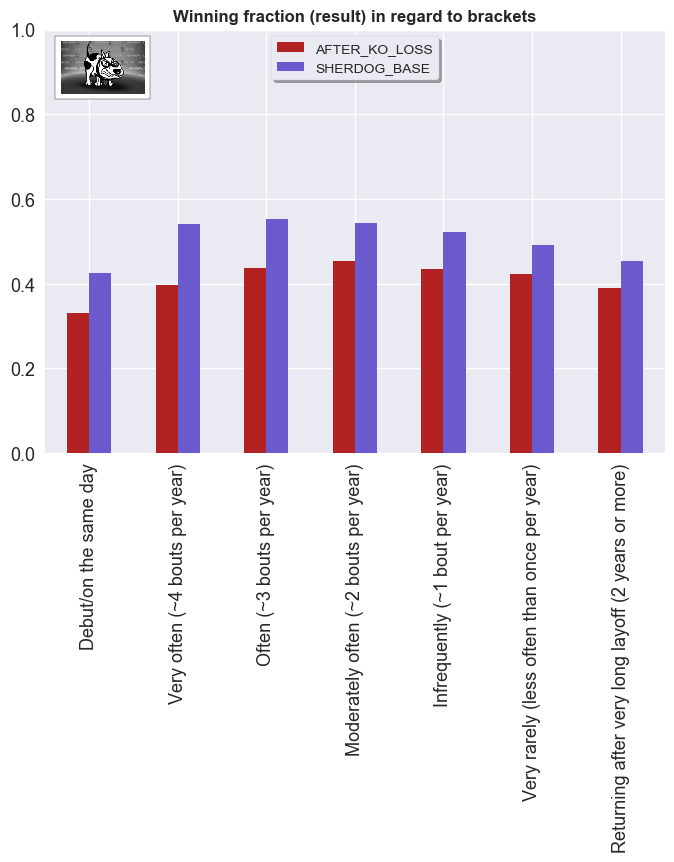

In [282]:
create_occ_barplot(sherdog_ako_frame, 'sherdog', ['firebrick', 'slateblue'])

Sherdog's database analysis result in regard to bouts where fighter was coming back after KO/TKO loss, looks very interesting. **First of all, there is strong, negative correlation between returning after KO/TKO loss and having chance of winning.** This relation can be observed for each single bracket, which also makes sense from an intuition standpoint - we tend to decrease fighter's chances of winning in next fight, if he previously had lost by knockout.

**Secondly, by looking into each interval, we can observe that disparity in result is increasing with the rise of frequency represented by brackets.**
If fighter decides to take a fight within 90 days from his last KO/TKO loss, his chances are approximately *14 percentage points* lower, than they would be, if there was no leading KO/TKO loss. On the other hand, if fighter decides to wait more or less one year, his chances are a bit less than *10 percentage points lower*. Finally, if layoff takes longer than one year, his chances of winning are lower by *7 percentage points*.

**Described tendency that confirms hypothesis is definitely present, although percentage differences have not reached level which was established at the beginning of the analysis as statistically significant.** As we can see, fighter which has decided to wait up over two year increased his chances of winning by *7 percentage points* (base level was *14 percentage points* difference with frequency interval described as very often and there is *7 percentage points* difference for category labeled as - Returning after very long layoff).

Now it is time to check, if having a 5-round fight (independently from result) is having any impact on how long fighter should wait before taking next bout in regard to chances of getting positive result (win) in his next fight.

In [283]:
ufc_extra_data[0:10]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval,Method,Round
0,Shamil Abdurakhimov,loss,UFC 242 - Khabib vs. Poirier,2019-09-07,140,Moderately often (~2 bouts per year),TKO (Elbow and Punch),2
1,Shamil Abdurakhimov,win,UFC Fight Night 149 - Overeem vs. Oleynik,2019-04-20,217,Infrequently (~1 bout per year),TKO (Punches),2
2,Shamil Abdurakhimov,win,UFC Fight Night 136 - Hunt vs. Oleynik,2018-09-15,294,Infrequently (~1 bout per year),Decision (Unanimous),3
3,Shamil Abdurakhimov,win,UFC Fight Night 122 - Bisping vs. Gastelum,2017-11-25,351,Infrequently (~1 bout per year),KO (Punches),1
4,Shamil Abdurakhimov,loss,UFC Fight Night 102 - Lewis vs. Abdurakhimov,2016-12-09,69,Very often (~4 bouts per year),TKO (Punches),4
5,Shamil Abdurakhimov,win,UFC Fight Night 96 - Lineker vs. Dodson,2016-10-01,223,Infrequently (~1 bout per year),Decision (Split),3
6,Shamil Abdurakhimov,win,UFC Fight Night 83 - Cerrone vs. Oliveira,2016-02-21,323,Infrequently (~1 bout per year),Decision (Unanimous),3
7,Shamil Abdurakhimov,loss,UFC Fight Night 63 - Mendes vs. Lamas,2015-04-04,301,Infrequently (~1 bout per year),TKO (Punches),1
8,Shamil Abdurakhimov,win,M-1 Challenge 49 - Battle in the Mountains,2014-06-07,246,Infrequently (~1 bout per year),Decision (Unanimous),3
9,Shamil Abdurakhimov,win,Tech-Krep FC - Southern Front 2,2013-10-04,551,Very rarely (less often than once per year),Decision (Unanimous),3


In [284]:
# Applying mask in order to filter through records that are meeting new analysis constraints. Assigning outcome to variable.
ufc_after_5r = ufc_extra_data[(ufc_extra_data['Round'].shift(-1) == 5) & 
                              (ufc_extra_data['Fighter'] == ufc_extra_data['Fighter'].shift(-1))].copy()

In [285]:
ufc_after_5r[0:20]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval,Method,Round
51,Israel Adesanya,win,UFC 243 - Whittaker vs. Adesanya,2019-10-05,175,Moderately often (~2 bouts per year),KO (Punches),2
54,Israel Adesanya,win,UFC 230 - Cormier vs. Lewis,2018-11-03,120,Often (~3 bouts per year),TKO (Knees and Punches),1
73,Kevin Aguilar,win,LFA 40 - Aguilar vs. Le,2018-05-25,294,Infrequently (~1 bout per year),KO (Punches),1
75,Kevin Aguilar,win,LFA 4 - Aguilar vs. Jackson,2017-02-17,231,Infrequently (~1 bout per year),KO (Punches),3
218,Jose Aldo,loss,UFC 212 - Aldo vs. Holloway,2017-06-03,329,Infrequently (~1 bout per year),TKO (Punches),3
220,Jose Aldo,loss,UFC 194 - Aldo vs. McGregor,2015-12-12,413,Very rarely (less often than once per year),KO (Punch),1
221,Jose Aldo,win,UFC 179 - Aldo vs. Mendes 2,2014-10-25,266,Infrequently (~1 bout per year),Decision (Unanimous),5
223,Jose Aldo,win,UFC 163 - Aldo vs. Korean Zombie,2013-08-03,182,Moderately often (~2 bouts per year),TKO (Punches),4
225,Jose Aldo,win,UFC 142 - Aldo vs. Mendes,2012-01-14,98,Often (~3 bouts per year),KO (Knee),1
226,Jose Aldo,win,UFC 136 - Edgar vs. Maynard 3,2011-10-08,161,Moderately often (~2 bouts per year),Decision (Unanimous),5


In [286]:
len(ufc_after_5r)

395

In [287]:
# Assigning 'Descriptive_interval' column to variable.
ufc_5r_brackets = ufc_after_5r['Descriptive_interval']

In [295]:
# Creating variables where interval data is assigned based on type of fight outcome.
ufc_5r_all_fights_count = ufc_5r_brackets.value_counts()
ufc_5r_win_fights_count = ufc_5r_brackets[ufc_after_5r['Result'] == 'win'].value_counts()
ufc_5r_loss_fights_count = ufc_5r_brackets[ufc_after_5r['Result'] == 'loss'].value_counts()
ufc_5r_draw_fights_count = ufc_5r_brackets[ufc_after_5r['Result'] == 'draw'].value_counts()
ufc_5r_nc_fights_count = ufc_5r_brackets[ufc_after_5r['Result'] == 'NC'].value_counts()

In [302]:
ufc_5r_all_fights_count

Moderately often (~2 bouts per year)                  140
Infrequently (~1 bout per year)                       131
Often (~3 bouts per year)                              48
Very often (~4 bouts per year)                         40
Very rarely (less often than once per year)            33
Returning after very long layoff (2 years or more)      3
Debut/on the same day                                   0
Name: Descriptive_interval, dtype: int64

In [293]:
# Checking if there are any missing values in 'Descriptive_interval' column.
ufc_after_5r[ufc_after_5r['Descriptive_interval'].isna()]

,Fighter,Result,Event,Event_date,Time_interval,Descriptive_interval,Method,Round


In [317]:
# Data validation - checking if there is any record that was not qualified as either win, loss, draw or no-contest.
ufc_5r_sum_of_brackets = (ufc_5r_win_fights_count.sum() + ufc_5r_loss_fights_count.sum() + ufc_5r_draw_fights_count.sum() 
                          + ufc_5r_nc_fights_count.sum())

if ufc_5r_all_fights_count.sum() == ufc_5r_sum_of_brackets:
    print('Verification successful!')

Verification successful!


In [319]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
ufc_5r_pct = ufc_5r_win_fights_count/(ufc_5r_win_fights_count + ufc_5r_loss_fights_count)

In [320]:
# Sorting results in ascending order.
ufc_5r_sorted = ufc_5r_pct.sort_values(ascending=False)

In [321]:
# Dropping debut category due to the lack of observations.
ufc_5r_sorted = ufc_5r_sorted.drop(labels=['Debut/on the same day'])

In [322]:
ufc_5r_sorted

Very often (~4 bouts per year)                        0.825000
Moderately often (~2 bouts per year)                  0.737226
Infrequently (~1 bout per year)                       0.726562
Returning after very long layoff (2 years or more)    0.666667
Often (~3 bouts per year)                             0.645833
Very rarely (less often than once per year)           0.468750
Name: Descriptive_interval, dtype: float64

In [323]:
ufc_pct_trunc

Returning after very long layoff (2 years or more)    0.830357
Very often (~4 bouts per year)                        0.800858
Often (~3 bouts per year)                             0.742574
Moderately often (~2 bouts per year)                  0.734148
Infrequently (~1 bout per year)                       0.722242
Very rarely (less often than once per year)           0.703540
Name: Descriptive_interval, dtype: float64

In [325]:
# Creating new data frame.
ufc_5r_frame = pd.DataFrame(dict(AFTER_5R_FIGHT = ufc_5r_sorted, UFC_ROSTER = ufc_pct_trunc))

In [326]:
# Reindexing data frames in order to get clearer visualization.
rep3_index = ['Very often (~4 bouts per year)', 'Often (~3 bouts per year)', 
             'Moderately often (~2 bouts per year)', 'Infrequently (~1 bout per year)',
             'Very rarely (less often than once per year)', 'Returning after very long layoff (2 years or more)']

ufc_5r_frame = ufc_5r_frame.reindex(index=rep3_index)

In [327]:
ufc_5r_frame

,AFTER_5R_FIGHT,UFC_ROSTER
Very often (~4 bouts per year),0.825000,0.800858
Often (~3 bouts per year),0.645833,0.742574
Moderately often (~2 bouts per year),0.737226,0.734148
Infrequently (~1 bout per year),0.726562,0.722242
Very rarely (less often than once per year),0.468750,0.703540
Returning after very long layoff (2 years or more),0.666667,0.830357


<Figure size 1800x900 with 0 Axes>

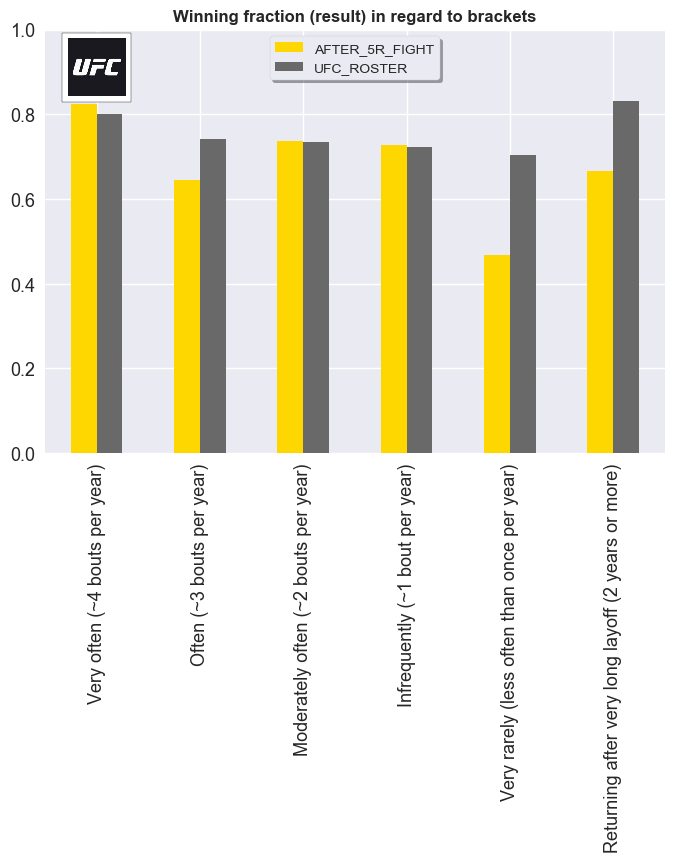

In [328]:
create_occ_barplot(ufc_5r_frame, 'ufc', ['gold','dimgrey'])

UFC roster analysis have not revealed any correlation between result and a fact, that fighter's previous bout was a 5 round fight. It is worth mentioning, that number of observations was quite low - below 100, only two brackets representing frequency of 1 and 2 bouts per year exceeded 100 observations. As we can see on the chart, especially these two brackets have not revealed any correlation.

Lets look at Sherdog's database from the same angle.

In [329]:
sherdog_extra_data[0:10]

,Fighter,Result,Event_date,Time_interval,Descriptive_interval,Method,Round
0,Tony Galindo,loss,2005-03-20,758,Returning after very long layoff (2 years or m...,KO (Punches),1
1,Tony Galindo,loss,2003-02-21,530,Very rarely (less often than once per year),TKO (Corner Stoppage),1
2,Tony Galindo,loss,2001-09-09,78,Very often (~4 bouts per year),TKO (Corner Stoppage),2
3,Tony Galindo,win,2001-06-23,119,Often (~3 bouts per year),Decision,2
4,Tony Galindo,draw,2001-02-24,87,Very often (~4 bouts per year),Draw,2
5,Tony Galindo,win,2000-11-29,158,Moderately often (~2 bouts per year),TKO (Punches),1
6,Tony Galindo,win,2000-06-24,0,Debut/on the same day,KO (Punch),1
7,Kurt Rojo,loss,2000-12-09,168,Moderately often (~2 bouts per year),Decision,3
8,Kurt Rojo,loss,2000-06-24,0,Debut/on the same day,KO (Punch),1
9,Brian Hawkins,loss,2006-03-18,1121,Returning after very long layoff (2 years or m...,Submission (Heel Hook),1


In [330]:
# Applying mask in order to filter through records that are meeting new analysis constraint.
sherdog_after_5r = sherdog_extra_data[(sherdog_extra_data['Round'].shift(-1) == 5) & 
                              (sherdog_extra_data['Fighter'] == sherdog_extra_data['Fighter'].shift(-1))].copy()

In [331]:
sherdog_after_5r[0:10]

,Fighter,Result,Event_date,Time_interval,Descriptive_interval,Method,Round
214,Ricco Rodriguez,loss,2003-02-28,154,Moderately often (~2 bouts per year),TKO (Punches),1
753,Dan Severn,win,2004-11-20,69,Very often (~4 bouts per year),TKO (Punches),2
963,Joe Stevenson,win,2016-07-30,547,Very rarely (less often than once per year),TKO (Punches),1
1239,Travis Fulton,win,2006-12-15,28,Very often (~4 bouts per year),TKO (Submission to Slam),3
2016,Gary Goodridge,win,2002-06-23,174,Moderately often (~2 bouts per year),Decision (Split),3
2318,Tito Ortiz,loss,2004-04-02,189,Infrequently (~1 bout per year),KO (Punches),2
2320,Tito Ortiz,win,2002-11-22,420,Very rarely (less often than once per year),TKO (Corner Stoppage),3
2324,Tito Ortiz,win,2000-12-16,246,Infrequently (~1 bout per year),Submission (Neck Crank),1
2362,Kevin Randleman,loss,2000-11-17,161,Moderately often (~2 bouts per year),TKO (Strikes),3
2363,Kevin Randleman,win,2000-06-09,203,Infrequently (~1 bout per year),Decision (Unanimous),5


In [332]:
len(sherdog_after_5r)

3152

In [333]:
# Assigning 'Descriptive_interval' column to variable.
sherdog_5r_brackets = sherdog_after_5r['Descriptive_interval']

In [335]:
# Creating variables where interval data is assigned based on type of fight outcome.
sherdog_5r_all_fights_count = sherdog_5r_brackets.value_counts()
sherdog_5r_win_fights_count = sherdog_5r_brackets[sherdog_after_5r['Result'] == 'win'].value_counts()
sherdog_5r_loss_fights_count = sherdog_5r_brackets[sherdog_after_5r['Result'] == 'loss'].value_counts()
sherdog_5r_draw_fights_count = sherdog_5r_brackets[sherdog_after_5r['Result'] == 'draw'].value_counts()
sherdog_5r_nc_fights_count = sherdog_5r_brackets[sherdog_after_5r['Result'] == 'NC'].value_counts()

In [336]:
sherdog_5r_all_fights_count

Infrequently (~1 bout per year)                       888
Moderately often (~2 bouts per year)                  777
Very often (~4 bouts per year)                        679
Often (~3 bouts per year)                             418
Very rarely (less often than once per year)           296
Returning after very long layoff (2 years or more)     84
Debut/on the same day                                  10
Name: Descriptive_interval, dtype: int64

In [337]:
# Checking if there are any missing values in 'Descriptive_interval' column.
sherdog_after_5r[sherdog_after_5r['Descriptive_interval'].isna()]

,Fighter,Result,Event_date,Time_interval,Descriptive_interval,Method,Round


In [338]:
# Data validation - checking if there is any record that was not qualified as either win, loss, draw or no-contest.
sherdog_5r_sum_of_brackets = (sherdog_5r_win_fights_count.sum() + sherdog_5r_loss_fights_count.sum() + 
sherdog_5r_draw_fights_count.sum() + sherdog_5r_nc_fights_count.sum())

if sherdog_5r_all_fights_count.sum() == sherdog_5r_sum_of_brackets:
    print('Verification successful!')

Verification successful!


In [339]:
# Assigning result (percentage ratio between amount of wins and total amount of wins and losses) to variable.
sherdog_5r_pct = sherdog_5r_win_fights_count/(sherdog_5r_win_fights_count + sherdog_5r_loss_fights_count)

In [340]:
# Sorting results in ascending order.
sherdog_5r_sorted = sherdog_5r_pct.sort_values(ascending=False)

In [341]:
sherdog_5r_sorted

Moderately often (~2 bouts per year)                  0.641830
Often (~3 bouts per year)                             0.627451
Very often (~4 bouts per year)                        0.614114
Infrequently (~1 bout per year)                       0.599307
Very rarely (less often than once per year)           0.547368
Returning after very long layoff (2 years or more)    0.481481
Debut/on the same day                                 0.400000
Name: Descriptive_interval, dtype: float64

In [342]:
sherdog_pct_sorted

Often (~3 bouts per year)                             0.553287
Moderately often (~2 bouts per year)                  0.542192
Very often (~4 bouts per year)                        0.539734
Infrequently (~1 bout per year)                       0.521535
Very rarely (less often than once per year)           0.490557
Returning after very long layoff (2 years or more)    0.454122
Debut/on the same day                                 0.424212
Name: Descriptive_interval, dtype: float64

In [344]:
# Creating new data frame.
sherdog_5r_frame = pd.DataFrame(dict(AFTER_5R_FIGHT = sherdog_5r_sorted, SHERDOG_BASE = sherdog_pct_sorted))

In [345]:
# Reindexing data frames in order to get clearer visualization.
rep4_index = ['Debut/on the same day', 'Very often (~4 bouts per year)', 'Often (~3 bouts per year)', 
             'Moderately often (~2 bouts per year)', 'Infrequently (~1 bout per year)',
             'Very rarely (less often than once per year)', 'Returning after very long layoff (2 years or more)']

sherdog_5r_frame = sherdog_5r_frame.reindex(index=rep4_index)

In [346]:
sherdog_5r_frame

,AFTER_5R_FIGHT,SHERDOG_BASE
Debut/on the same day,0.400000,0.424212
Very often (~4 bouts per year),0.614114,0.539734
Often (~3 bouts per year),0.627451,0.553287
Moderately often (~2 bouts per year),0.641830,0.542192
Infrequently (~1 bout per year),0.599307,0.521535
Very rarely (less often than once per year),0.547368,0.490557
Returning after very long layoff (2 years or more),0.481481,0.454122


<Figure size 1800x900 with 0 Axes>

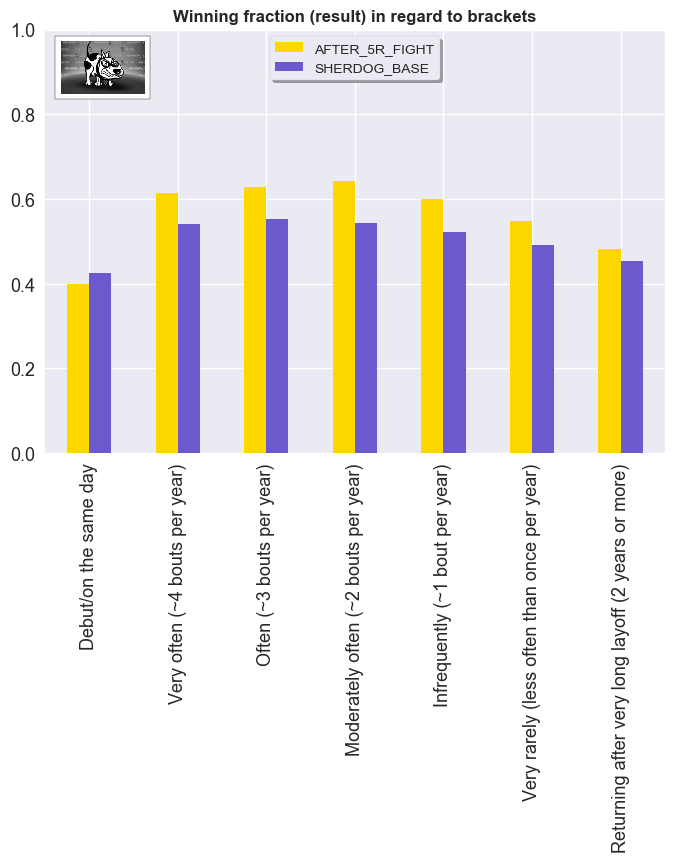

In [347]:
create_occ_barplot(sherdog_5r_frame, 'sherdog', ['gold', 'slateblue'])

Sherdog's database results are quite interesting - there is minor positive correlation between fighting a 5 round bout and scoring a positive result (win) in next fight. It is hard to explain, why this can be the case, although there is definitely no reliance on time intervals. 

## Segment 6: *Summary, conclusions and interesting facts on the side note*

**Analysis revealed, that there is statistically significant relationship between taking a fight within 91 - 182 days since last bout and returning after break longer than 2 years, in regard to result based on data collected for all fighters.** Fighter that is coming back after 91 to 182 days break will have *10 percentage points* higher chances of getting positive result (win) on average. Foregoing reliance was not confirmed on UFC roster population.

Evident distinction between results for Sherdog's database and UFC roster (regardless time intervals) was observed. UFC roster had on average **20-30 percentage points higher result** for each bracket.

**Fighting frequency of 1 or 2 fights per year predominate inside UFC** - there was the highest amount of observations for these two categories.

**Analysis demonstrated, that there is basically no difference between fighting with frequency of 1, 2 or 3 times per year inside UFC, in regard to result.** Moreover there was noticable (not to degree where it becomes statistically significant), negative impact on result connected with interval describing highest frequency of 4 bouts per year and one which is related to lower frequency than 1 bout per year. Both these brackets have scored **6-7 percentage points** lower result.

Analysis showed that fighting less often than once per year, but more often than once per 2 years is disadvantageous for UFC roster fighters as well as for UFC roster fighting exclusively inside UFC.

When it comes to gender breakdown, we have observed that women in UFC are scoring higher results in brackets representing lower frequency (1-2 bouts per year). Time interval between **121 and 365 days** looks like optimal time between fights in regard to result. It has to be noticed, that we have observed surprisingly high results for men and women, who were returning after very long layoff (over 2 years). That was especially the case for women, where result for this bracket was relevantly higher.
Based on that, we can speculate, that there is no thing such as "ring rust" or that fighters that are coming back after very long break are being matched with relatively low-skilled opponents. That would imply, that UFC is basically using tune up fights mechanism. We can not rule out that both of these things are true and they do coexist.

Lets look at some very specific dependencies characteristic for weight classes in UFC:

* In light-heavyweight division high frequency is an advantage in regard to result. Bracket which is representing frequency of 4 bouts per year scored 14 percentage points higher result than interval connected to frequency of 1 bout per year.

* In middleweight division the worst outcome was scored by two boundary brackets - 4 bouts per year and less often than once per year. Both these brackets scored 10 percentage points lower result than interval representing frequency of 2 bouts per year.

* In lightweight and featherweight divisions, we have observed that the lower frequency is, the better the results are.

* In men's bantamweight bracket representing very low frequency (less often than once per year) scored 30% percentage points lower result than other brackets.

* In women's strawweight bracket representing very low frequency scored highest result, being approximately 10 percentage points ahead.

* In women's flyweight division bracket representing time interval of 1 bout per year scored the highest result (over 10 percentage points higher than other brackets).

* In women's bantamweight highest result was obtained by two intervals - one representing frequency of 1 bout per year and second representing frequency of 2 bouts per year. Both brackets scored 15 percentage points higher result than the rest.

Lets see what analysis which took special circumstances into account revealed:

* There is strong, negative correlation between returning after KO/TKO loss and probability of winning next fight based on Sherdog's database analysis.

* We have observed upward trend in probability of getting positive result (win) for fighters in Sherdog's database that were coming back after KO/TKO loss, along with extended time between fights. Despite the fact that tendency was flawless, the differences were not high enough to classify them as statistically significant.

* We have observed statistically significant, positive correlation for Sherdog's database between probability of getting positive result (win) and returning after 5 round fight. Despite that fact, we have not observed any differences in regard to time intervals.

* In contrast to all fighters in Sherdog's database, there was **no noticable correlation** between returning after KO/TKO loss and probability of winning next fight, for fighters included in UFC roster.

* In contrast to all fighters in Sherdog's database, there was **no noticable correlation** between returning after 5 round fight and probability of winning next fight, for fighters included in UFC roster.

Finally, we have observed that, **over 80% of fighters in current UFC roster, had won their MMA debut.**

Longest layoff in history of professional MMA can be attributed to - Mikhail Onufrienko. His layoff took **8730 days**, which is roughly **24 years!**. Our record-holder took a loss via KO in his brave return. Frankly, it is quite unbelievable that someone decided to return after such a long time... unless this is just dreadful blunder by Sherdog.

In [348]:
sherdog_selected_data.loc[sherdog_selected_data['Time_interval'].idxmax()]

Fighter                                                Mikhail Onufrienko
Result                                                               loss
Event_date                                            2019-09-08 00:00:00
Time_interval                                                        8730
Descriptive_interval    Returning after very long layoff (2 years or m...
Name: 222877, dtype: object